In [58]:
from numpy import sqrt, floor, random, Infinity, zeros, array, nanmin
from pandas import DataFrame
import matplotlib.pyplot as plt

(This study was completed as a term project for Dr. Mirsadeghi's "Applied Stochastic Processes" class at Sharif University of Technology.)

The method used in this project is **The Discrete Event Simulation Approach**

The environment gets more complex throughout the parts, e.g. you can find the **lockdown effects in part 3-c.**

In this project, whenever it is said that an event with a rate will occur, it means that the occurrence of the next event is an exponential variable whose parameter is equal to the rate. In other words, if that event is repetitive, the occurrence of that event is a Poisson process with said rate.

Figures show the simulated number of healthy, sick, recovered, and dead people. 

Note that people in the Convalescence (recovery) period are part of the recovered people and their number is not shown in the graphs.

Suppose we have a society of n people, at zero time ni of them get an infectious disease. In addition, suppose that every person who becomes ill, after a random time such as tr coming from a given distribution (for example, uniform), regains his health with a probability of pr, or dies with pd.

The patient who recovers has a Convalescence (recovery) period of tu. Suppose the number of members of the community does not increase during the simulation period and this disease is the only cause of death.


## Constants

In [59]:
n = 100 # Population
ni = 2 # No of sick people at t=0
T = 40 # End date

pr = 0.75 # Recovery probability
pd = 1 - pr # Death probability

# tr : time to recover, uniform distribution in [a,b]
a = 5
b = 15
# tr = random.randint(a, b+1)
#
tu = 10 # Convalescence period after recovery

mu = 0.02 # parameter of getting sick

l = 40 # Area  is l*l
c_t = 8 # distance threshold
pQ = 0.9

l_sc = 4
mu_g = 0.2
a_g = 0.2
b_g = 1

NSC = 4 # No. of Shopping centers
l_NSC = [2,3,4,5]

## Part 4:
w = 8
a_b = 0.2
b_b = 0.45
a_e = 0.55
b_e = 0.8

## Part 4:
n_home = int(floor(sqrt(n * 0.8))) # n_home * n_home


In [60]:
def f1(people, i, j):
    dist = sqrt( (people.loc[i,'x'] - people.loc[j,'x'])**2 + (people.loc[i,'y'] - people.loc[j,'y'])**2 )
    if dist < c_t :
        delta = 1
    else:
        delta = 0
    res = mu * delta
    return(res)

def f2(people, i, j):
    dist = sqrt( (people.loc[i,'x'] - people.loc[j,'x'])**2 + (people.loc[i,'y'] - people.loc[j,'y'])**2 )
    if dist < c_t :
        delta = 1
    else:
        delta = 0
    res = mu * delta / (1 + dist)
    return(res)


def f1_SC(people, i, j):
    dist = sqrt( (people.loc[i,'x_SC'] - people.loc[j,'x_SC'])**2 + (people.loc[i,'y_SC'] - people.loc[j,'y_SC'])**2 )
    if dist < c_t :
        delta = 1
    else:
        delta = 0
    res = mu * delta
    return(res)

def f2_SC(people, i, j):
    dist = sqrt( (people.loc[i,'x_SC'] - people.loc[j,'x_SC'])**2 + (people.loc[i,'y_SC'] - people.loc[j,'y_SC'])**2 )
    if dist < c_t :
        delta = 1
    else:
        delta = 0
    res = mu * delta / (1 + dist)
    return(res)

def f1_WP(people, i, j):
    dist = sqrt( (people.loc[i,'x_Work'] - people.loc[j,'x_Work'])**2 + (people.loc[i,'y_Work'] - people.loc[j,'y_Work'])**2 )
    if dist < c_t :
        delta = 1
    else:
        delta = 0
    res = mu * delta
    return(res)

def f2_WP(people, i, j):
    dist = sqrt( (people.loc[i,'x_Work'] - people.loc[j,'x_Work'])**2 + (people.loc[i,'y_Work'] - people.loc[j,'y_Work'])**2 )
    if dist < c_t :
        delta = 1
    else:
        delta = 0
    res = mu * delta / (1 + dist)
    return(res)

## Part 1

 ~~~~~~ 1-a ~~~~~~ 
Part 1. A) Suppose every person gets sick at the rate of mu. 
 Also, assume that the person does not get sick after recovery.


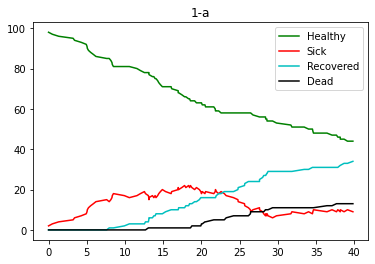

In [61]:
## a)
print(" ~~~~~~ 1-a ~~~~~~ \n"
"Part 1. A) Suppose every person gets sick at the rate of mu. \n "
"Also, assume that the person does not get sick after recovery.")

"""
1- Time Variable:
t

2- Counter Variables:
timeline: A Dataframe for recording all events through the time

3- State Variables of System:
nh # No. of healthy
ns # No. ofsick
nr # No. of recovered
nd # No. of death

4- Event list:
tS: time of next sick
RorD_times: A list keeping recovery or death times of next patients
"""

# Initialize:
t = 0
ns = ni # Initial sick
nh = n - ns # Initial healthy and disease potential
nr = 0 # No. of recovered
nd = 0 # No. of death
# A list keeping recovery or death times of next patients:
RorD_times = DataFrame({'t': [Infinity]})
# RorD_times of the Initial sick:
for s in range(ns):
    tRorD = a + (b - a)*random.uniform()
    RorD_times = RorD_times.append({'t': t + tRorD}, ignore_index=True)
#
# Reporting Dataframe:
timeline = DataFrame({'t': [t],
                      'Healthy': [nh],
                      'Sick': [ns],
                      'Recovered':nr, 
                      'Dead': nd})
#
tS = random.exponential(scale=1/(nh * mu)) # Event of first sick
while t < T :
    if (tS < min(RorD_times['t'])) & (tS < T) :
        t = tS
        nh -= 1
        ns += 1
        # Recording the Healthy & Sick at t:
        timeline = timeline.append({'t': t,
                                    'Healthy': nh,
                                    'Sick': ns}, ignore_index=True)
        # Recording the recovery or death of this sick:
        tRorD = a + (b - a)*random.uniform()
        RorD_times = RorD_times.append({'t': t + tRorD}, ignore_index=True)
        # time of the next sick from the healthy stock:
        if nh > 0 :
            tS = t + random.exponential(scale=1/(nh * mu))
        else:
            tS = Infinity
            
    if (min(RorD_times['t']) < tS) & (min(RorD_times['t']) < T) :
        t = min(RorD_times['t'])
        RorD_times.loc[ RorD_times['t'] == min(RorD_times['t']) ] = Infinity
        u = random.uniform()
        if u < pr : # Someone recovers
            ns -= 1
            nr += 1
            timeline = timeline.append({'t': t,
                                        'Sick': ns,
                                        'Recovered': nr}, ignore_index=True)
        else: # Someone dies
            ns -= 1
            nd += 1
            timeline = timeline.append({'t': t,
                                        'Sick': ns,
                                        'Dead': nd}, ignore_index=True)
    if (tS > T) & (min(RorD_times['t']) > T) :
        t = T
        break

# Filling the Reporting Dataframe:
# timeline.sort_values(by='t', inplace=True)
timeline = timeline.ffill()

plt.figure(1)
plt.plot(timeline['t'], timeline['Healthy'], "g-", label="Healthy")
plt.plot(timeline['t'], timeline['Sick'], "r-", label="Sick")
plt.plot(timeline['t'], timeline['Recovered'], "c-", label="Recovered")
plt.plot(timeline['t'], timeline['Dead'], "k-", label="Dead")
plt.legend()
plt.title("1-a")
plt.show()


 ~~~~~~ 1-b ~~~~~~ 
Part 1. b) Suppose the person after recovery is like a person who has not had the disease. 
 


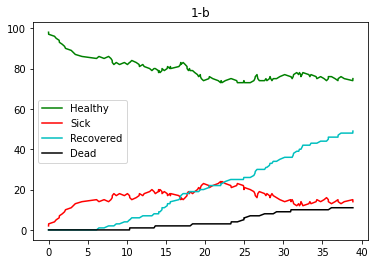

In [62]:
## b)
print(" ~~~~~~ 1-b ~~~~~~ \n"
"Part 1. b) Suppose the person after recovery is like a person who has not had the disease. \n ")

# Initialize:
t = 0
ns = ni # Initial sick
nh = n - ns # Initial healthy and disease potential
nr = 0
nd = 0
# A list keeping recovery or death times of next patients:
RorD_times = DataFrame({'t': [Infinity]})
# RorD_times of the Initial sick:
for s in range(ns):
    tRorD = a + (b - a)*random.uniform()
    RorD_times = RorD_times.append({'t': t + tRorD}, ignore_index=True)
#
# Reporting Dataframe:
timeline = DataFrame({'t': [t],
                      'Healthy': [nh],
                      'Sick': [ns],
                      'Recovered':nr, 
                      'Dead': nd})
#
tS = random.exponential(scale=1/(nh * mu)) # Event of next sick
while t < T :
    if (tS < min(RorD_times['t'])) & (tS < T) :
        t = tS
        nh -= 1
        ns += 1
        # recording the Healthy & Sick at t:
        timeline = timeline.append({'t': t,
                                    'Healthy': nh,
                                    'Sick': ns}, ignore_index=True)
        # recording the recovery or death of this sick:
        tRorD = a + (b - a)*random.uniform()
        RorD_times = RorD_times.append({'t': t + tRorD}, ignore_index=True)
        # time of the next sick from the healthy stock:
        if nh > 0 :
            tS = t + random.exponential(scale=1/(nh * mu))
        else:
            tS = Infinity
            
    if (min(RorD_times['t']) < tS) & (min(RorD_times['t']) < T) :
        t = min(RorD_times['t'])
        RorD_times.loc[ RorD_times['t'] == min(RorD_times['t']) ] = Infinity
        u = random.uniform()
        if u < pr : # Someone recovers
            ns -= 1
            nr += 1
            nh += 1 # ****
            timeline = timeline.append({'t': t,
                                        'Sick': ns,
                                        'Recovered': nr,
                                        'Healthy': nh}, ignore_index=True)
            tS = t + random.exponential(scale=1/(nh * mu)) # ****
        else: # Someone dies
            ns -= 1
            nd += 1
            timeline = timeline.append({'t': t,
                                        'Sick': ns,
                                        'Dead': nd}, ignore_index=True)
    if (tS > T) & (min(RorD_times['t']) > T) :
        t = T
        break

# Filling the Reporting Dataframe:
# timeline.sort_values(by='t', inplace=True)
timeline = timeline.ffill()

plt.figure(2)
plt.plot(timeline['t'], timeline['Healthy'], "g-", label="Healthy")
plt.plot(timeline['t'], timeline['Sick'], "r-", label="Sick")
plt.plot(timeline['t'], timeline['Recovered'], "c-", label="Recovered")
plt.plot(timeline['t'], timeline['Dead'], "k-", label="Dead")
plt.title("1-b")
plt.legend()
plt.show()



## Part 2

 ~~~~~~ 2-a ~~~~~~ 
Part 2. a) Suppose every person gets sick at the rate of mu multiplied by ns. 
 Also, assume that the person does not get sick after recovery.


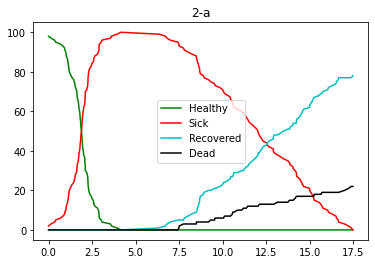

In [63]:
## a)
print(" ~~~~~~ 2-a ~~~~~~ \n"
"Part 2. a) Suppose every person gets sick at the rate of mu multiplied by ns. \n Also, assume that the person does not get sick after recovery.")

# Initialize:
t = 0
ns = ni # Initial sick
nh = n - ns # Initial healthy and disease potential
nr = 0
nd = 0
# A list keeping recovery or death times of next patients:
RorD_times = DataFrame({'t': [Infinity]})
# RorD_times of the Initial sick:
for s in range(ns):
    tRorD = a + (b - a)*random.uniform()
    RorD_times = RorD_times.append({'t': t + tRorD}, ignore_index=True)
#
# Reporting Dataframe:
timeline = DataFrame({'t': [t],
                      'Healthy': [nh],
                      'Sick': [ns],
                      'Recovered':nr,
                      'Dead': nd})
#
tS = random.exponential(scale=1/(nh * ns * mu)) # Event of next sick
while t < T :
    if (tS < min(RorD_times['t'])) & (tS < T) :
        t = tS
        nh -= 1
        ns += 1
        # recording the Healthy & Sick at t:
        timeline = timeline.append({'t': t,
                                    'Healthy': nh,
                                    'Sick': ns}, ignore_index=True)
        # recording the recovery or death of this sick:
        tRorD = a + (b - a)*random.uniform()
        RorD_times = RorD_times.append({'t': t + tRorD}, ignore_index=True)
        # time of the next sick from the healthy stock:
        if nh > 0 :
            tS = t + random.exponential(scale=1/(nh * ns * mu))
        else:
            tS = Infinity
            
    if (min(RorD_times['t']) < tS) & (min(RorD_times['t']) < T) :
        t = min(RorD_times['t'])
        RorD_times.loc[ RorD_times['t'] == min(RorD_times['t']) ] = Infinity
        u = random.uniform()
        if u < pr : # Someone recovers
            ns -= 1
            nr += 1
            timeline = timeline.append({'t': t,
                                        'Sick': ns,
                                        'Recovered': nr}, ignore_index=True)
        else: # Someone dies
            ns -= 1
            nd += 1
            timeline = timeline.append({'t': t,
                                        'Sick': ns,
                                        'Dead': nd}, ignore_index=True)
        if (ns > 0) & (nh > 0) :
            tS = t + random.exponential(scale=1/(nh * ns * mu))
        else:
            tS = Infinity
    
    if (tS > T) & (min(RorD_times['t']) > T) :
        t = T
        break

# Filling the Reporting Dataframe:
# timeline.sort_values(by='t', inplace=True)
timeline = timeline.ffill()

plt.figure(3)
plt.plot(timeline['t'], timeline['Healthy'], "g-", label="Healthy")
plt.plot(timeline['t'], timeline['Sick'], "r-", label="Sick")
plt.plot(timeline['t'], timeline['Recovered'], "c-", label="Recovered")
plt.plot(timeline['t'], timeline['Dead'], "k-", label="Dead")
plt.legend()
plt.title("2-a")
plt.show()


Now, assume that the person after recovery is like a person who has not had the disease.


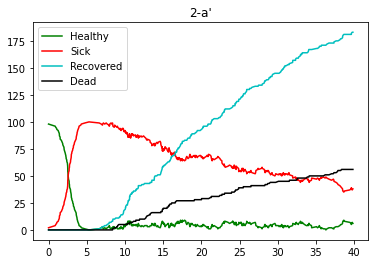

In [64]:
print("Now, assume that the person after recovery is like a person who has not had the disease.")

# Initialize:
t = 0
ns = ni # Initial sick
nh = n - ns # Initial healthy and disease potential
nr = 0
nd = 0
# A list keeping recovery or death times of next patients:
RorD_times = DataFrame({'t': [Infinity]})
# RorD_times of the Initial sick:
for s in range(ns):
    tRorD = a + (b - a)*random.uniform()
    RorD_times = RorD_times.append({'t': t + tRorD}, ignore_index=True)
#
# Reporting Dataframe:
timeline = DataFrame({'t': [t],
                      'Healthy': [nh],
                      'Sick': [ns],
                      'Recovered':nr,
                      'Dead': nd})
#
tS = random.exponential(scale=1/(nh * ns * mu)) # Event of next sick
while t < T :
    if (tS < min(RorD_times['t'])) & (tS < T) :
        t = tS
        nh -= 1
        ns += 1
        # recording the Healthy & Sick at t:
        timeline = timeline.append({'t': t,
                                    'Healthy': nh,
                                    'Sick': ns}, ignore_index=True)
        # recording the recovery or death of this sick:
        tRorD = a + (b - a)*random.uniform()
        RorD_times = RorD_times.append({'t': t + tRorD}, ignore_index=True)
        # time of the next sick from the healthy stock:
        if nh > 0 :
            tS = t + random.exponential(scale=1/(nh * ns * mu))
        else:
            tS = Infinity
            
    if (min(RorD_times['t']) < tS) & (min(RorD_times['t']) < T) :
        t = min(RorD_times['t'])
        RorD_times.loc[ RorD_times['t'] == min(RorD_times['t']) ] = Infinity
        u = random.uniform()
        if u < pr : # Someone recovers
            ns -= 1
            nr += 1
            nh += 1
            timeline = timeline.append({'t': t,
                                        'Sick': ns,
                                        'Recovered': nr,
                                        'Healthy': nh}, ignore_index=True)
        else: # Someone dies
            ns -= 1
            nd += 1
            timeline = timeline.append({'t': t,
                                        'Sick': ns,
                                        'Dead': nd}, ignore_index=True)
        if (ns > 0) & (nh > 0) :
            tS = t + random.exponential(scale=1/(nh * ns * mu))
        else:
            tS = Infinity
        
    if (tS > T) & (min(RorD_times['t']) > T) :
        t = T
        break

# Filling the Reporting Dataframe:
# timeline.sort_values(by='t', inplace=True)
timeline = timeline.ffill()

plt.figure(4)
plt.plot(timeline['t'], timeline['Healthy'], "g-", label="Healthy")
plt.plot(timeline['t'], timeline['Sick'], "r-", label="Sick")
plt.plot(timeline['t'], timeline['Recovered'], "c-", label="Recovered")
plt.plot(timeline['t'], timeline['Dead'], "k-", label="Dead")
plt.title("2-a'")
plt.legend()
plt.show()


 ~~~~~~ 2-b ~~~~~~ 
Part 2. b) Suppose every person gets sick at the rate of mu multiplied by (ns + nu)  
 Also, assume that the person does not get sick after recovery.


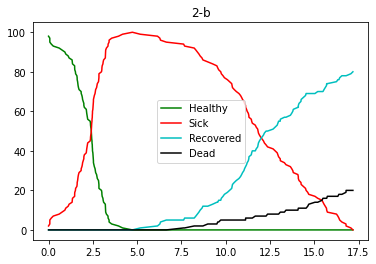

In [65]:
## b)
print(" ~~~~~~ 2-b ~~~~~~ \n"
"Part 2. b) Suppose every person gets sick at the rate of mu multiplied by (ns + nu)  \n Also, assume that the person does not get sick after recovery.")

# Initialize:
t = 0
ns = ni # Initial sick
nh = n - ns # Initial healthy and disease potential
nr = 0
nd = 0
nu = 0
# A list keeping recovery or death times of next patients:
RorD_times = DataFrame({'t': [Infinity]})
# RorD_times of the Initial sick:
for s in range(ns):
    tRorD = a + (b - a)*random.uniform()
    RorD_times = RorD_times.append({'t': t + tRorD}, ignore_index=True)
#
# A list keeping Convalescence times of recovered people:
u_times = DataFrame({'t': [Infinity]})
#
# Reporting Dataframe:
timeline = DataFrame({'t': [t],
                      'Healthy': [nh],
                      'Sick': [ns],
                      'Recovered':nr, 
                      'Dead': nd}) 
#
tS = random.exponential(scale=1/(nh * (ns+nu) * mu)) # Event of next sick
while t < T :
    if (tS < min(RorD_times['t'])) & (tS < min(u_times['t'])) & (tS < T) :
        t = tS
        nh -= 1
        ns += 1
        # recording the Healthy & Sick at t:
        timeline = timeline.append({'t': t,
                                    'Healthy': nh,
                                    'Sick': ns}, ignore_index=True)
        # recording the recovery or death of this sick:
        tRorD = a + (b - a)*random.uniform()
        RorD_times = RorD_times.append({'t': t + tRorD}, ignore_index=True)
        # time of the next sick from the healthy stock:
        if nh > 0 :
            tS = t + random.exponential(scale=1/(nh * (ns+nu) * mu))
        else:
            tS = Infinity
            
    if (min(RorD_times['t']) < tS) & (min(RorD_times['t']) < min(u_times['t'])) & (min(RorD_times['t']) < T) :
        t = min(RorD_times['t'])
        RorD_times.loc[ RorD_times['t'] == min(RorD_times['t']) ] = Infinity
        u = random.uniform()
        if u < pr : # Someone recovers
            ns -= 1
            nr += 1
            nu += 1 # (ns+nu) remains constant, so no need to new tS
            u_times = u_times.append({'t': t + tu}, ignore_index=True)
            timeline = timeline.append({'t': t,
                                        'Sick': ns,
                                        'Recovered': nr}, ignore_index=True)
        else: # Someone dies
            ns -= 1
            nd += 1
            timeline = timeline.append({'t': t,
                                        'Sick': ns,
                                        'Dead': nd}, ignore_index=True)
            if ((ns+nu) > 0) & (nh > 0) :
                tS = t + random.exponential(scale=1/(nh * (ns+nu) * mu))
            else:
                tS = Infinity

    if (min(u_times['t']) < tS) & (min(u_times['t']) < min(RorD_times['t'])) & (min(u_times['t']) < T) :
        t = min(u_times['t'])
        u_times.loc[ u_times['t'] == min(u_times['t']) ] = Infinity
        nu -= 1
        if ((ns+nu) > 0) & (nh > 0) :
            tS = t + random.exponential(scale=1/(nh * (ns+nu) * mu))
        else:
            tS = Infinity
    
    if (tS > T) & (min(RorD_times['t']) > T) & (min(u_times['t']) > T) :
        t = T
        break

# Filling the Reporting Dataframe:
# timeline.sort_values(by='t', inplace=True)
timeline = timeline.ffill()

plt.figure(5)
plt.plot(timeline['t'], timeline['Healthy'], "g-", label="Healthy")
plt.plot(timeline['t'], timeline['Sick'], "r-", label="Sick")
plt.plot(timeline['t'], timeline['Recovered'], "c-", label="Recovered")
plt.plot(timeline['t'], timeline['Dead'], "k-", label="Dead")
plt.legend()
plt.title("2-b")
plt.show()


Now, assume that the person after recovery is like a person who has not had the disease.


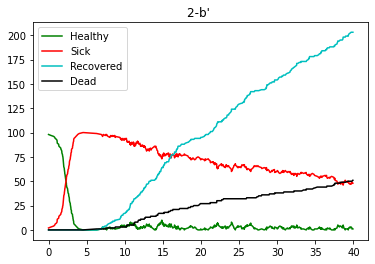

In [66]:
print("Now, assume that the person after recovery is like a person who has not had the disease.")

# Initialize:
t = 0
ns = ni # Initial sick
nh = n - ns # Initial healthy and disease potential
nr = 0
nd = 0
nu = 0
# A list keeping recovery or death times of next patients:
RorD_times = DataFrame({'t': [Infinity]})
# RorD_times of the Initial sick:
for s in range(ns):
    tRorD = a + (b - a)*random.uniform()
    RorD_times = RorD_times.append({'t': t + tRorD}, ignore_index=True)
#
# A list keeping Convalescence times of recovered people:
u_times = DataFrame({'t': [Infinity]})
#
# Reporting Dataframe:
timeline = DataFrame({'t': [t],
                      'Healthy': [nh],
                      'Sick': [ns],
                      'Recovered':nr, 
                      'Dead': nd})
#
tS = random.exponential(scale=1/(nh * (ns+nu) * mu)) # Event of next sick
while t < T :
    if (tS < min(RorD_times['t'])) & (tS < min(u_times['t'])) & (tS < T) :
        t = tS
        nh -= 1
        ns += 1
        # recording the Healthy & Sick at t:
        timeline = timeline.append({'t': t,
                                    'Healthy': nh,
                                    'Sick': ns}, ignore_index=True)
        # recording the recovery or death of this sick:
        tRorD = a + (b - a)*random.uniform()
        RorD_times = RorD_times.append({'t': t + tRorD}, ignore_index=True)
        # time of the next sick from the healthy stock:
        if nh > 0 :
            tS = t + random.exponential(scale=1/(nh * (ns+nu) * mu))
        else:
            tS = Infinity
            
    if (min(RorD_times['t']) < tS) & (min(RorD_times['t']) < min(u_times['t'])) & (min(RorD_times['t']) < T) :
        t = min(RorD_times['t'])
        RorD_times.loc[ RorD_times['t'] == min(RorD_times['t']) ] = Infinity
        u = random.uniform()
        if u < pr : # Someone recovers
            ns -= 1
            nr += 1
            nu += 1
            nh += 1
            u_times = u_times.append({'t': t + tu}, ignore_index=True)
            timeline = timeline.append({'t': t,
                                        'Sick': ns,
                                        'Recovered': nr,
                                        'Healthy': nh}, ignore_index=True)
        else: # Someone dies
            ns -= 1
            nd += 1
            timeline = timeline.append({'t': t,
                                        'Sick': ns,
                                        'Dead': nd}, ignore_index=True)
        if ((ns+nu) > 0) & (nh > 0) :
            tS = t + random.exponential(scale=1/(nh * (ns+nu) * mu))
        else:
            tS = Infinity

    if (min(u_times['t']) < tS) & (min(u_times['t']) < min(RorD_times['t'])) & (min(u_times['t']) < T) :
        t = min(u_times['t'])
        u_times.loc[ u_times['t'] == min(u_times['t']) ] = Infinity
        nu -= 1
        if ((ns+nu) > 0) & (nh > 0) :
            tS = t + random.exponential(scale=1/(nh * (ns+nu) * mu))
        else:
            tS = Infinity
        
    if (tS > T) & (min(RorD_times['t']) > T) & (min(u_times['t']) > T) :
        t = T
        break

# Filling the Reporting Dataframe:
# timeline.sort_values(by='t', inplace=True)
timeline = timeline.ffill()

plt.figure(6)
plt.plot(timeline['t'], timeline['Healthy'], "g-", label="Healthy")
plt.plot(timeline['t'], timeline['Sick'], "r-", label="Sick")
plt.plot(timeline['t'], timeline['Recovered'], "c-", label="Recovered")
plt.plot(timeline['t'], timeline['Dead'], "k-", label="Dead")
plt.title("2-b' ")
plt.legend()
plt.show()


## Part 3

Suppose the location of each member of the community is a random point (fixed) in the square l*l and f (i; j) is a descending function of d (i; j) the distance between j and i. Consider these two functions as examples

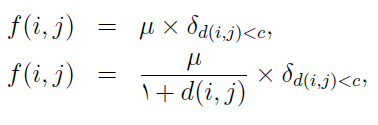

## a)

Assume 
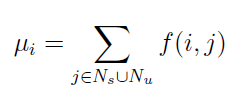

In [67]:
"""
1- Time Variable:
t

2- Counter Variables:
timeline: A Dataframe for recording all events through the time

3- System State Variable:
people
nh
ns
nr
nd

4- Event list:
tS: time of next sick
tRorD: recovery or death times of next patients

"""

'\n1- Time Variable:\nt\n\n2- Counter Variables:\ntimeline: A Dataframe for recording all events through the time\n\n3- System State Variable:\npeople\nnh\nns\nnr\nnd\n\n4- Event list:\ntS: time of next sick\ntRorD: recovery or death times of next patients\n\n'

 ~~~~~~ 3-a ~~~~~~ 
 Assume that the person does not get sick after recovery.


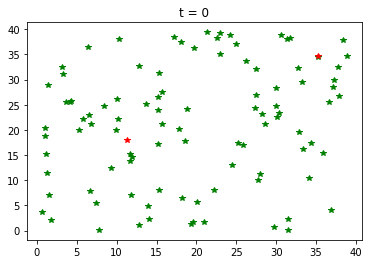

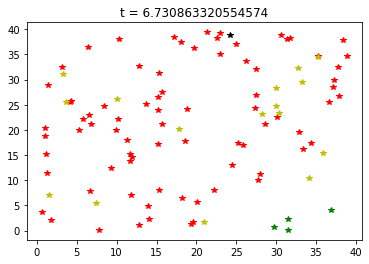

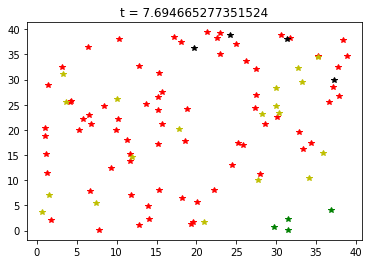

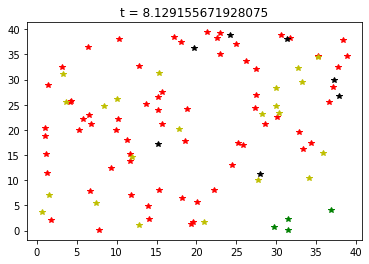

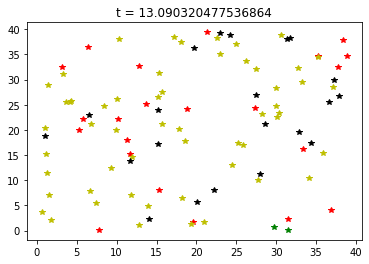

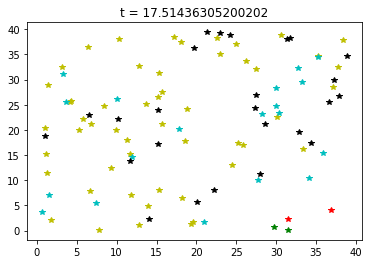

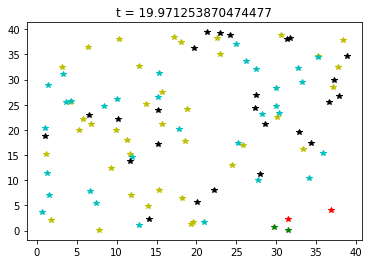

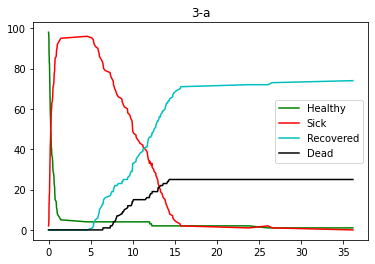

In [68]:
print(" ~~~~~~ 3-a ~~~~~~ \n Assume that the person does not get sick after recovery.")

# Initialize:
# We need a table to keep the records of the state of each person, 
# because locations matter:
people = DataFrame({'x': l * random.rand(n),
                    'y': l * random.rand(n),
                    'tS': [Infinity] * n,
                    'tRorD': [Infinity] * n,
                    'tU': [Infinity] * n,
                    'state': 'h'})
t = 0
ns = ni # Initial sick
nh = n - ns # Initial healthy and disease potential
nr = 0
nd = 0
nu = 0
# Reporting Dataframe:
timeline = DataFrame({'t': [t],
                      'Healthy': nh,
                      'Sick': ns,
                      'Recovered':nr,
                      'Dead': nd})

# Assigning the initial sicks randomly:
init_sicks = [random.randint(n) for x in range(ns)]
for sick in init_sicks :
    people.loc[sick, 'state'] = 's'
    people.loc[sick, 'tRorD'] = a + (b - a)*random.uniform()
#

# Assigning the initial tS for each person:
for i in people[people['state'] == 'h'].index :
    mu_i = 0
    for j in people[(people['state'] == 's') | (people['state'] == 'u')].index :
        mu_i += f1(people, i, j)
    if mu_i == 0 :
        people.loc[i, 'tS'] = Infinity
    else:
        people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))
#

while t < T :
    if t * 10000 // 1 % 79 == 0 : # Showing some snapshots of the population
        plt.figure(100)
        plt.plot(people.loc[people['state'] == 'h', 'x'], people.loc[people['state'] == 'h', 'y'], "g*")
        plt.plot(people.loc[people['state'] == 's', 'x'], people.loc[people['state'] == 's', 'y'], "r*")
        plt.plot(people.loc[people['state'] == 'u', 'x'], people.loc[people['state'] == 'u', 'y'], "y*")
        plt.plot(people.loc[people['state'] == 'r', 'x'], people.loc[people['state'] == 'r', 'y'], "c*")
        plt.plot(people.loc[people['state'] == 'd', 'x'], people.loc[people['state'] == 'd', 'y'], "k*")
        plt.title("t = " + str(t))
        plt.show()
    
    if (min(people['tS']) < min(people['tRorD'])) & (min(people['tS']) < min(people['tU'])) & (min(people['tS']) < T) :
        t = min(people['tS'])
        indx = people[ people['tS'] == min(people['tS'])].index
        nh -= 1
        ns += 1
        people.loc[indx, 'tS'] = Infinity
        people.loc[indx, 'state'] = 's'
        # Recording the recovery or death of this sick:
        tRorD = a + (b - a)*random.uniform()
        people.loc[indx, 'tRorD'] = t + tRorD
        # Recording the Healthy & Sick at t:
        timeline = timeline.append({'t': t,
                                    'Healthy': nh,
                                    'Sick': ns}, ignore_index=True)
        # Updating the tS for all the healthy people:
        if nh > 0 :
            for i in people[people['state'] == 'h'].index :
                mu_i = 0
                for j in people[(people['state'] == 's') | (people['state'] == 'u')].index :
                    mu_i += f1(people, i, j)
                if mu_i == 0 :
                    people.loc[i, 'tS'] = Infinity
                else:
                    people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))


    if (min(people['tRorD']) < min(people['tS'])) & (min(people['tRorD']) < min(people['tU'])) & (min(people['tRorD']) < T) :
        t = min(people['tRorD'])
        indx = people[ people['tRorD'] == min(people['tRorD'])].index
        people.loc[indx, 'tRorD'] = Infinity
        u = random.uniform()
        if u < pr : # Someone recovers
            people.loc[indx, 'state'] = 'u'
            people.loc[indx, 'tU'] = t + tu
            ns -= 1
            nr += 1
            nu += 1
            timeline = timeline.append({'t': t,
                                        'Sick': ns,
                                        'Recovered': nr}, ignore_index=True)
        else: # Someone dies
            people.loc[indx, 'state'] = 'd'
            ns -= 1
            nd += 1
            timeline = timeline.append({'t': t,
                                        'Sick': ns,
                                        'Dead': nd}, ignore_index=True)
        # Updating the tS for all the healthy people:
        if nh > 0 :
            for i in people[people['state'] == 'h'].index :
                mu_i = 0
                for j in people[(people['state'] == 's') | (people['state'] == 'u')].index :
                    mu_i += f1(people, i, j)
                if mu_i == 0 :
                    people.loc[i, 'tS'] = Infinity
                else:
                    people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))

    
    if (min(people['tU']) < min(people['tS'])) & (min(people['tU']) < min(people['tRorD'])) & (min(people['tU']) < T) :
        t = min(people['tU'])
        indx = people[ people['tU'] == min(people['tU'])].index
        people.loc[indx, 'state'] = 'r'
        people.loc[indx, 'tU'] = Infinity
        nu -= 1
        # Updating the tS for all the healthy people:
        if nh > 0 :
            for i in people[people['state'] == 'h'].index :
                mu_i = 0
                for j in people[(people['state'] == 's') | (people['state'] == 'u')].index :
                    mu_i += f1(people, i, j)
                if mu_i == 0 :
                    people.loc[i, 'tS'] = Infinity
                else:
                    people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))
        
        
    if (min(people['tS']) > T) & (min(people['tRorD']) > T)  & (min(people['tU']) > T):
        t = T
        break

# Filling the Reporting Dataframe:
# timeline.sort_values(by='t', inplace=True)
timeline = timeline.ffill()

plt.figure(9)
plt.plot(timeline['t'], timeline['Healthy'], "g-", label="Healthy")
plt.plot(timeline['t'], timeline['Sick'], "r-", label="Sick")
plt.plot(timeline['t'], timeline['Recovered'], "c-", label="Recovered")
plt.plot(timeline['t'], timeline['Dead'], "k-", label="Dead")
plt.legend()
plt.title("3-a")
plt.show()


 ~~~~~~ 3-a' ~~~~~~ 
 Suppose the person after recovery is like a person who has not had the disease.


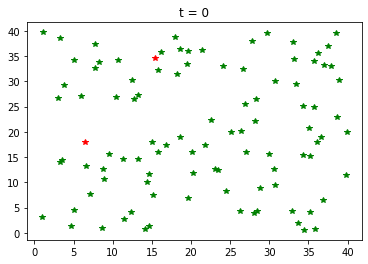

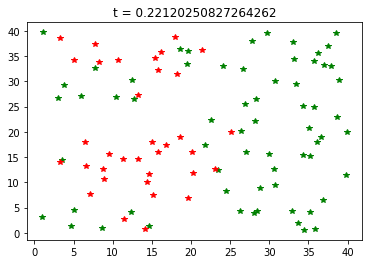

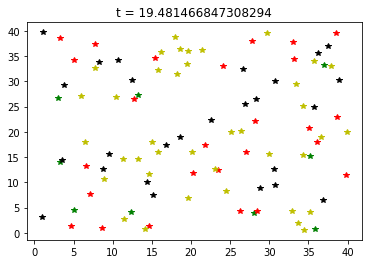

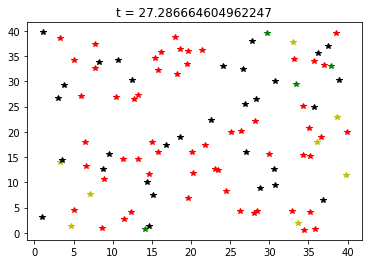

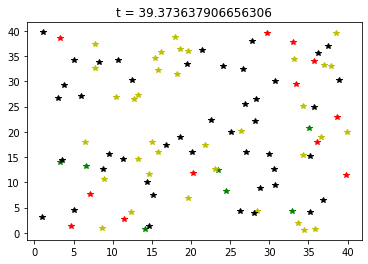

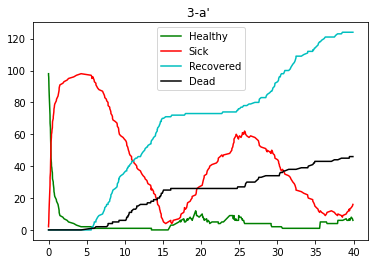

In [69]:
print(" ~~~~~~ 3-a' ~~~~~~ \n Suppose the person after recovery is like a person who has not had the disease.")

# Initialize:
# We need a table to keep the records of the state of each person, 
# because locations matter:
people = DataFrame({'x': l * random.rand(n),
                    'y': l * random.rand(n),
                    'tS': [Infinity] * n,
                    'tRorD': [Infinity] * n,
                    'tU': [Infinity] * n,
                    'state': 'h'})
t = 0
ns = ni # Initial sick
nh = n - ns # Initial healthy and disease potential
nr = 0
nd = 0
nu = 0
# Reporting Dataframe:
timeline = DataFrame({'t': [t],
                      'Healthy': nh,
                      'Sick': ns,
                      'Recovered':nr,
                      'Dead': nd})

# Assigning the initial sicks randomly:
init_sicks = [random.randint(n) for x in range(ns)]
for sick in init_sicks :
    people.loc[sick, 'state'] = 's'
    people.loc[sick, 'tRorD'] = a + (b - a)*random.uniform()
#

# Assigning the initial tS for each person:
for i in people[people['state'] == 'h'].index :
    mu_i = 0
    for j in people[(people['state'] == 's') | (people['state'] == 'u')].index :
        mu_i += f1(people, i, j)
    if mu_i == 0 :
        people.loc[i, 'tS'] = Infinity
    else:
        people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))
#

while t < T :
    if t * 10000 // 1 % 79 == 0 : # Showing some snapshots of the population
        plt.figure(101)
        plt.plot(people.loc[people['state'] == 'h', 'x'], people.loc[people['state'] == 'h', 'y'], "g*")
        plt.plot(people.loc[people['state'] == 's', 'x'], people.loc[people['state'] == 's', 'y'], "r*")
        plt.plot(people.loc[people['state'] == 'u', 'x'], people.loc[people['state'] == 'u', 'y'], "y*")
        plt.plot(people.loc[people['state'] == 'r', 'x'], people.loc[people['state'] == 'r', 'y'], "c*")
        plt.plot(people.loc[people['state'] == 'd', 'x'], people.loc[people['state'] == 'd', 'y'], "k*")
        plt.title("t = " + str(t))
        plt.show()
    
    if (min(people['tS']) < min(people['tRorD'])) & (min(people['tS']) < min(people['tU'])) & (min(people['tS']) < T) :
        t = min(people['tS'])
        indx = people[ people['tS'] == min(people['tS'])].index
        nh -= 1
        ns += 1
        people.loc[indx, 'tS'] = Infinity
        people.loc[indx, 'state'] = 's'
        # Recording the recovery or death of this sick:
        tRorD = a + (b - a)*random.uniform()
        people.loc[indx, 'tRorD'] = t + tRorD
        # Recording the Healthy & Sick at t:
        timeline = timeline.append({'t': t,
                                    'Healthy': nh,
                                    'Sick': ns}, ignore_index=True)
        # Updating the tS for all the healthy people:
        if nh > 0 :
            for i in people[people['state'] == 'h'].index :
                mu_i = 0
                for j in people[(people['state'] == 's') | (people['state'] == 'u')].index :
                    mu_i += f1(people, i, j)
                if mu_i == 0 :
                    people.loc[i, 'tS'] = Infinity
                else:
                    people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))


    if (min(people['tRorD']) < min(people['tS'])) & (min(people['tRorD']) < min(people['tU'])) & (min(people['tRorD']) < T) :
        t = min(people['tRorD'])
        indx = people[ people['tRorD'] == min(people['tRorD'])].index
        people.loc[indx, 'tRorD'] = Infinity
        u = random.uniform()
        if u < pr : # Someone recovers
            people.loc[indx, 'state'] = 'u'
            people.loc[indx, 'tU'] = t + tu
            ns -= 1
            nr += 1
            nu += 1
            timeline = timeline.append({'t': t,
                                        'Sick': ns,
                                        'Recovered': nr}, ignore_index=True)
        else: # Someone dies
            people.loc[indx, 'state'] = 'd'
            ns -= 1
            nd += 1
            timeline = timeline.append({'t': t,
                                        'Sick': ns,
                                        'Dead': nd}, ignore_index=True)
        # Updating the tS for all the healthy people:
        if nh > 0 :
            for i in people[people['state'] == 'h'].index :
                mu_i = 0
                for j in people[(people['state'] == 's') | (people['state'] == 'u')].index :
                    mu_i += f1(people, i, j)
                if mu_i == 0 :
                    people.loc[i, 'tS'] = Infinity
                else:
                    people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))


    if (min(people['tU']) < min(people['tS'])) & (min(people['tU']) < min(people['tRorD'])) & (min(people['tU']) < T) :
        t = min(people['tU'])
        indx = people[ people['tU'] == min(people['tU'])].index
        people.loc[indx, 'state'] = 'h'
        people.loc[indx, 'tU'] = Infinity
        nu -= 1
        nh += 1
        # Updating the tS for all the healthy people:
        if nh > 0 :
            for i in people[people['state'] == 'h'].index :
                mu_i = 0
                for j in people[(people['state'] == 's') | (people['state'] == 'u')].index :
                    mu_i += f1(people, i, j)
                if mu_i == 0 :
                    people.loc[i, 'tS'] = Infinity
                else:
                    people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))

    
    if (min(people['tS']) > T) & (min(people['tRorD']) > T)  & (min(people['tU']) > T):
        t = T
        break

# Filling the Reporting Dataframe:
# timeline.sort_values(by='t', inplace=True)
timeline = timeline.ffill()

plt.figure(10)
plt.plot(timeline['t'], timeline['Healthy'], "g-", label="Healthy")
plt.plot(timeline['t'], timeline['Sick'], "r-", label="Sick")
plt.plot(timeline['t'], timeline['Recovered'], "c-", label="Recovered")
plt.plot(timeline['t'], timeline['Dead'], "k-", label="Dead")
plt.legend()
plt.title("3-a' ")
plt.show()


## b)

Assume 
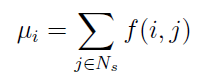

 ~~~~~~ 3-b ~~~~~~ 
 Assume that the person does not get sick after recovery.


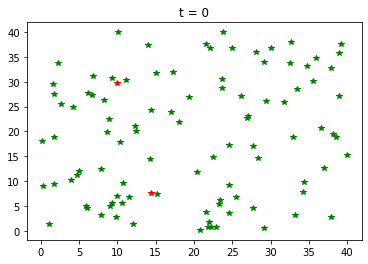

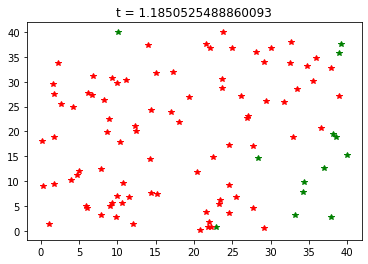

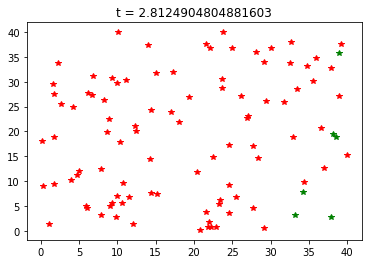

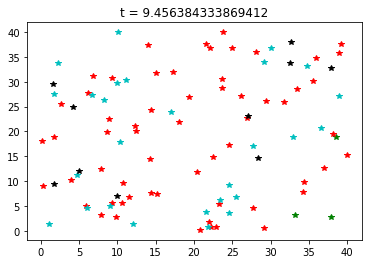

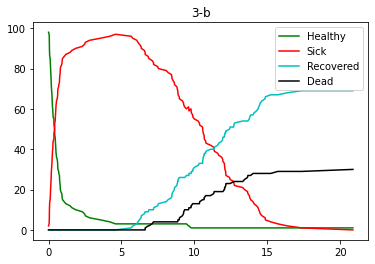

In [70]:
print(" ~~~~~~ 3-b ~~~~~~ \n Assume that the person does not get sick after recovery.")

from numpy import random, Infinity
from pandas import DataFrame
import matplotlib.pyplot as plt
import disease_spread_constants as c
# Initialize:
# We need a table to keep the records of the state of each person, 
# because locations matter:
people = DataFrame({'x': l * random.rand(n),
                    'y': l * random.rand(n),
                    'tS': [Infinity] * n,
                    'tRorD': [Infinity] * n,
                    'state': 'h'})
t = 0
ns = ni # Initial sick
nh = n - ns # Initial healthy and disease potential
nr = 0
nd = 0
# Reporting Dataframe:
timeline = DataFrame({'t': [t],
                      'Healthy': nh,
                      'Sick': ns,
                      'Recovered':nr,
                      'Dead': nd})

# Assigning the initial sicks randomly:
init_sicks = [random.randint(n) for x in range(ns)]
for sick in init_sicks :
    people.loc[sick, 'state'] = 's'
    people.loc[sick, 'tRorD'] = a + (b - a)*random.uniform()
#

# Assigning the initial tS for each person:
for i in people[people['state'] == 'h'].index :
    mu_i = 0
    for j in people[people['state'] == 's'].index :
        mu_i += f1(people, i, j)
    if mu_i == 0 :
        people.loc[i, 'tS'] = Infinity
    else:
        people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))
#

while t < T :
    if t * 10000 // 1 % 79 == 0 : # Showing some snapshots of the population
        plt.figure(102)
        plt.plot(people.loc[people['state'] == 'h', 'x'], people.loc[people['state'] == 'h', 'y'], "g*")
        plt.plot(people.loc[people['state'] == 's', 'x'], people.loc[people['state'] == 's', 'y'], "r*")
        plt.plot(people.loc[people['state'] == 'r', 'x'], people.loc[people['state'] == 'r', 'y'], "c*")
        plt.plot(people.loc[people['state'] == 'd', 'x'], people.loc[people['state'] == 'd', 'y'], "k*")
        plt.title("t = " + str(t))
        plt.show()
    if (min(people['tS']) < min(people['tRorD'])) & (min(people['tS']) < T) :
        t = min(people['tS'])
        indx = people[ people['tS'] == min(people['tS'])].index
        nh -= 1
        ns += 1
        people.loc[indx, 'tS'] = Infinity
        people.loc[indx, 'state'] = 's'
        # Recording the recovery or death of this sick:
        tRorD = a + (b - a)*random.uniform()
        people.loc[indx, 'tRorD'] = t + tRorD
        # Recording the Healthy & Sick at t:
        timeline = timeline.append({'t': t,
                                    'Healthy': nh,
                                    'Sick': ns}, ignore_index=True)
        # Updating the tS for all the healthy people:
        if nh > 0 :
            for i in people[people['state'] == 'h'].index :
                mu_i = 0
                for j in people[people['state'] == 's'].index :
                    mu_i += f1(people, i, j)
                if mu_i == 0 :
                    people.loc[i, 'tS'] = Infinity
                else:
                    people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))


    if (min(people['tRorD']) < min(people['tS'])) & (min(people['tRorD']) < T) :
        t = min(people['tRorD'])
        indx = people[ people['tRorD'] == min(people['tRorD'])].index
        people.loc[indx, 'tRorD'] = Infinity
        u = random.uniform()
        if u < pr : # Someone recovers
            people.loc[indx, 'state'] = 'r'
            ns -= 1
            nr += 1
            timeline = timeline.append({'t': t,
                                        'Sick': ns,
                                        'Recovered': nr}, ignore_index=True)
        else: # Someone dies
            people.loc[indx, 'state'] = 'd'
            ns -= 1
            nd += 1
            timeline = timeline.append({'t': t,
                                        'Sick': ns,
                                        'Dead': nd}, ignore_index=True)
        # Updating the tS for all the healthy people:
        if nh > 0 :
            for i in people[people['state'] == 'h'].index :
                mu_i = 0
                for j in people[people['state'] == 's'].index :
                    mu_i += f1(people, i, j)
                if mu_i == 0 :
                    people.loc[i, 'tS'] = Infinity
                else:
                    people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))

    
    if (min(people['tS']) > T) & (min(people['tRorD']) > T) :
        t = T
        break

# Filling the Reporting Dataframe:
# timeline.sort_values(by='t', inplace=True)
timeline = timeline.ffill()

plt.figure(11)
plt.plot(timeline['t'], timeline['Healthy'], "g-", label="Healthy")
plt.plot(timeline['t'], timeline['Sick'], "r-", label="Sick")
plt.plot(timeline['t'], timeline['Recovered'], "c-", label="Recovered")
plt.plot(timeline['t'], timeline['Dead'], "k-", label="Dead")
plt.legend()
plt.title("3-b")
plt.show()


 ~~~~~~ 3-b' ~~~~~~ 
 Suppose the person after recovery is like a person who has not had the disease.


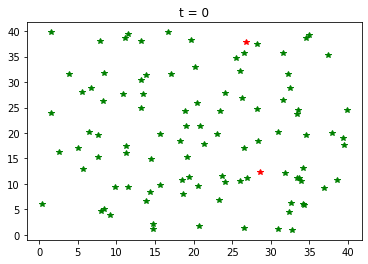

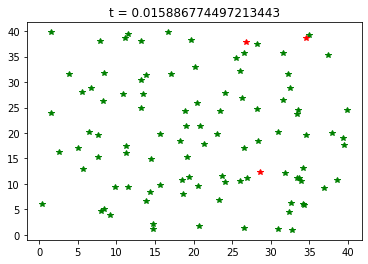

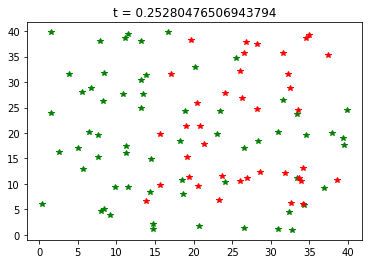

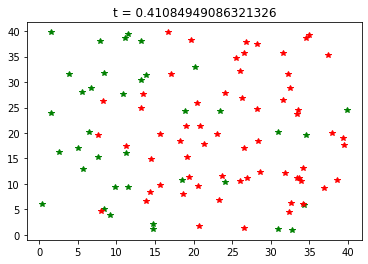

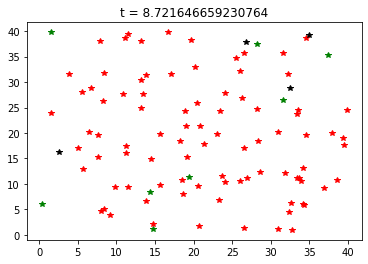

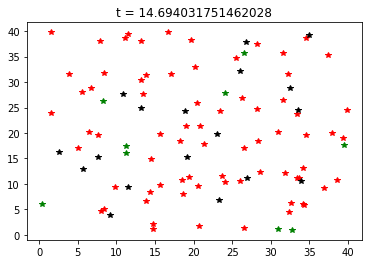

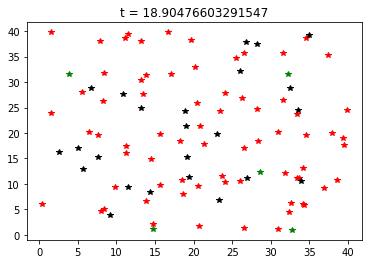

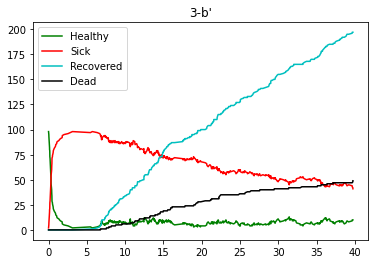

In [71]:
print(" ~~~~~~ 3-b' ~~~~~~ \n Suppose the person after recovery is like a person who has not had the disease.")

# Initialize:
# We need a table to keep the records of the state of each person, 
# because locations matter:
people = DataFrame({'x': l * random.rand(n),
                    'y': l * random.rand(n),
                    'tS': [Infinity] * n,
                    'tRorD': [Infinity] * n,
                    'state': 'h'})
t = 0
ns = ni # Initial sick
nh = n - ns # Initial healthy and disease potential
nr = 0
nd = 0
# Reporting Dataframe:
timeline = DataFrame({'t': [t],
                      'Healthy': nh,
                      'Sick': ns,
                      'Recovered':nr,
                      'Dead': nd})

# Assigning the initial sicks randomly:
init_sicks = [random.randint(n) for x in range(ns)]
for sick in init_sicks :
    people.loc[sick, 'state'] = 's'
    people.loc[sick, 'tRorD'] = a + (b - a)*random.uniform()
#

# Assigning the initial tS for each person:
for i in people[people['state'] == 'h'].index :
    mu_i = 0
    for j in people[people['state'] == 's'].index :
        mu_i += f1(people, i, j)
    if mu_i == 0 :
        people.loc[i, 'tS'] = Infinity
    else:
        people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))
#

while t < T :
    if t * 10000 // 1 % 79 == 0 : # Showing some snapshots of the population
        plt.figure(103)
        plt.plot(people.loc[people['state'] == 'h', 'x'], people.loc[people['state'] == 'h', 'y'], "g*")
        plt.plot(people.loc[people['state'] == 's', 'x'], people.loc[people['state'] == 's', 'y'], "r*")
        plt.plot(people.loc[people['state'] == 'r', 'x'], people.loc[people['state'] == 'r', 'y'], "c*")
        plt.plot(people.loc[people['state'] == 'd', 'x'], people.loc[people['state'] == 'd', 'y'], "k*")
        plt.title("t = " + str(t))
        plt.show()
    if (min(people['tS']) < min(people['tRorD'])) & (min(people['tS']) < T) :
        t = min(people['tS'])
        indx = people[ people['tS'] == min(people['tS'])].index
        nh -= 1
        ns += 1
        people.loc[indx, 'tS'] = Infinity
        people.loc[indx, 'state'] = 's'
        # Recording the recovery or death of this sick:
        tRorD = a + (b - a)*random.uniform()
        people.loc[indx, 'tRorD'] = t + tRorD
        # Recording the Healthy & Sick at t:
        timeline = timeline.append({'t': t,
                                    'Healthy': nh,
                                    'Sick': ns}, ignore_index=True)
        # Updating the tS for all the healthy people:
        if nh > 0 :
            for i in people[people['state'] == 'h'].index :
                mu_i = 0
                for j in people[people['state'] == 's'].index :
                    mu_i += f1(people, i, j)
                if mu_i == 0 :
                    people.loc[i, 'tS'] = Infinity
                else:
                    people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))


    if (min(people['tRorD']) < min(people['tS'])) & (min(people['tRorD']) < T) :
        t = min(people['tRorD'])
        indx = people[ people['tRorD'] == min(people['tRorD'])].index
        people.loc[indx, 'tRorD'] = Infinity
        u = random.uniform()
        if u < pr : # Someone recovers
            people.loc[indx, 'state'] = 'h' # ****
            ns -= 1
            nr += 1
            nh += 1 # ****
            timeline = timeline.append({'t': t,
                                        'Sick': ns,
                                        'Recovered': nr,
                                        'Healthy': nh}, ignore_index=True) # ****
        else: # Someone dies
            people.loc[indx, 'state'] = 'd'
            ns -= 1
            nd += 1
            timeline = timeline.append({'t': t,
                                        'Sick': ns,
                                        'Dead': nd}, ignore_index=True)
        # Updating the tS for all the healthy people:
        if nh > 0 :
            for i in people[people['state'] == 'h'].index :
                mu_i = 0
                for j in people[people['state'] == 's'].index :
                    mu_i += f1(people, i, j)
                if mu_i == 0 :
                    people.loc[i, 'tS'] = Infinity
                else:
                    people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))

    
    if (min(people['tS']) > T) & (min(people['tRorD']) > T) :
        t = T
        break

# Filling the Reporting Dataframe:
# timeline.sort_values(by='t', inplace=True)
timeline = timeline.ffill()

plt.figure(12)
plt.plot(timeline['t'], timeline['Healthy'], "g-", label="Healthy")
plt.plot(timeline['t'], timeline['Sick'], "r-", label="Sick")
plt.plot(timeline['t'], timeline['Recovered'], "c-", label="Recovered")
plt.plot(timeline['t'], timeline['Dead'], "k-", label="Dead")
plt.legend()
plt.title("3-b'")
plt.show()


## c)

Quarantine model. Suppose everyone who gets sick is quarantined with a probability of pQ, and quarantine means that their distance from the rest becomes infinite during the illness.

 ~~~~~~ 3-c Quarantine model ~~~~~~ 
 Assume that the person does not get sick after recovery.


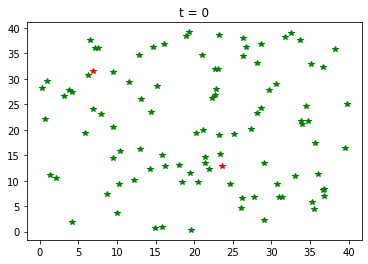

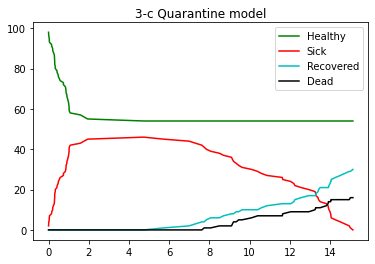

In [72]:
## c)
print(" ~~~~~~ 3-c Quarantine model ~~~~~~ \n Assume that the person does not get sick after recovery.")

# Initialize:
# We need a table to keep the records of the state of each person, 
# because locations matter:
people = DataFrame({'x': l * random.rand(n),
                    'y': l * random.rand(n),
                    'tS': [Infinity] * n,
                    'tRorD': [Infinity] * n,
                    'state': 'h',
                    'Quarantine': [0] * n})
t = 0
ns = ni # Initial sick
nh = n - ns # Initial healthy and disease potential
nr = 0
nd = 0
# Reporting Dataframe:
timeline = DataFrame({'t': [t],
                      'Healthy': nh,
                      'Sick': ns,
                      'Recovered':nr,
                      'Dead': nd})

# Assigning the initial sicks randomly:
init_sicks = [random.randint(n) for x in range(ns)]
for sick in init_sicks :
    people.loc[sick, 'state'] = 's'
    people.loc[sick, 'tRorD'] = a + (b - a)*random.uniform()
#

# Assigning the initial tS for each person:
for i in people[people['state'] == 'h'].index :
    mu_i = 0
    for j in people[people['state'] == 's'].index :
        mu_i += f1(people, i, j)
    if mu_i == 0 :
        people.loc[i, 'tS'] = Infinity
    else:
        people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))
#

while t < T :
    if t * 10000 // 1 % 79 == 0 : # Showing some snapshots of the population
        plt.figure(105)
        plt.plot(people.loc[people['state'] == 'h', 'x'], people.loc[people['state'] == 'h', 'y'], "g*")
        plt.plot(people.loc[people['state'] == 's', 'x'], people.loc[people['state'] == 's', 'y'], "r*")
        plt.plot(people.loc[people['state'] == 'r', 'x'], people.loc[people['state'] == 'r', 'y'], "c*")
        plt.plot(people.loc[people['state'] == 'd', 'x'], people.loc[people['state'] == 'd', 'y'], "k*")
        plt.title("t = " + str(t))
        plt.show()
    if (min(people['tS']) < min(people['tRorD'])) & (min(people['tS']) < T) :
        t = min(people['tS'])
        indx = people[ people['tS'] == min(people['tS'])].index
        nh -= 1
        ns += 1
        people.loc[indx, 'tS'] = Infinity
        people.loc[indx, 'state'] = 's'
        # Going to Quarantine?
        u = random.uniform()
        if u < pQ :
            people.loc[indx, 'Quarantine'] = 1
        # Recording the recovery or death of this sick:
        tRorD = a + (b - a)*random.uniform()
        people.loc[indx, 'tRorD'] = t + tRorD
        # Recording the Healthy & Sick at t:
        timeline = timeline.append({'t': t,
                                    'Healthy': nh,
                                    'Sick': ns}, ignore_index=True)
        # Updating the tS for all the healthy people:
        if nh > 0 :
            for i in people[people['state'] == 'h'].index :
                mu_i = 0
                for j in people[people['state'] == 's'].index :
                    if people.loc[j, 'Quarantine'] == 0 : # ****
                        mu_i += f1(people, i, j)
                if mu_i == 0 :
                    people.loc[i, 'tS'] = Infinity
                else:
                    people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))


    if (min(people['tRorD']) < min(people['tS'])) & (min(people['tRorD']) < T) :
        t = min(people['tRorD'])
        indx = people[ people['tRorD'] == min(people['tRorD'])].index
        people.loc[indx, 'tRorD'] = Infinity
        u = random.uniform()
        if u < pr : # Someone recovers
            people.loc[indx, 'state'] = 'r'
            people.loc[indx, 'Quarantine'] = 0
            ns -= 1
            nr += 1
            timeline = timeline.append({'t': t,
                                        'Sick': ns,
                                        'Recovered': nr}, ignore_index=True)
        else: # Someone dies
            people.loc[indx, 'state'] = 'd'
            ns -= 1
            nd += 1
            timeline = timeline.append({'t': t,
                                        'Sick': ns,
                                        'Dead': nd}, ignore_index=True)
        # Updating the tS for all the healthy people:
        if nh > 0 :
            for i in people[people['state'] == 'h'].index :
                mu_i = 0
                for j in people[people['state'] == 's'].index :
                    if people.loc[j, 'Quarantine'] == 0 : # ****
                        mu_i += f1(people, i, j)
                if mu_i == 0 :
                    people.loc[i, 'tS'] = Infinity
                else:
                    people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))

    
    if (min(people['tS']) > T) & (min(people['tRorD']) > T) :
        t = T
        break

# Filling the Reporting Dataframe:
# timeline.sort_values(by='t', inplace=True)
timeline = timeline.ffill()

plt.figure(12)
plt.plot(timeline['t'], timeline['Healthy'], "g-", label="Healthy")
plt.plot(timeline['t'], timeline['Sick'], "r-", label="Sick")
plt.plot(timeline['t'], timeline['Recovered'], "c-", label="Recovered")
plt.plot(timeline['t'], timeline['Dead'], "k-", label="Dead")
plt.legend()
plt.title("3-c Quarantine model")
plt.show()


 ~~~~~~ 3-c' Quarantine model ~~~~~~ 
 Suppose the person after recovery is like a person who has not had the disease.


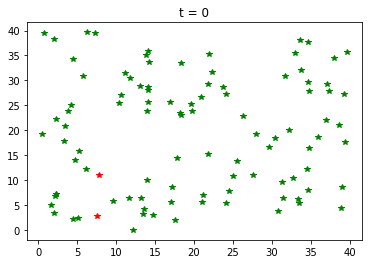

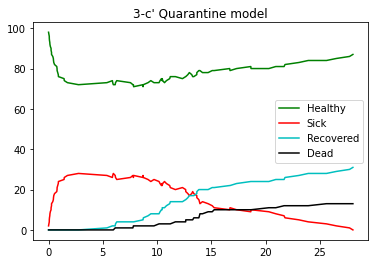

In [73]:
print(" ~~~~~~ 3-c' Quarantine model ~~~~~~ \n Suppose the person after recovery is like a person who has not had the disease.")

# Initialize:
# We need a table to keep the records of the state of each person, 
# because locations matter:
people = DataFrame({'x': l * random.rand(n),
                    'y': l * random.rand(n),
                    'tS': [Infinity] * n,
                    'tRorD': [Infinity] * n,
                    'state': 'h',
                    'Quarantine': [0] * n}) # *****
t = 0
ns = ni # Initial sick
nh = n - ns # Initial healthy and disease potential
nr = 0
nd = 0
# Reporting Dataframe:
timeline = DataFrame({'t': [t],
                      'Healthy': nh,
                      'Sick': ns,
                      'Recovered':nr,
                      'Dead': nd})

# Assigning the initial sicks randomly:
init_sicks = [random.randint(n) for x in range(ns)]
for sick in init_sicks :
    people.loc[sick, 'state'] = 's'
    people.loc[sick, 'tRorD'] = a + (b - a)*random.uniform()
#

# Assigning the initial tS for each person:
for i in people[people['state'] == 'h'].index :
    mu_i = 0
    for j in people[people['state'] == 's'].index :
        mu_i += f1(people, i, j)
    if mu_i == 0 :
        people.loc[i, 'tS'] = Infinity
    else:
        people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))
#

while t < T :
    if t * 10000 // 1 % 79 == 0 : # Showing some snapshots of the population
        plt.figure(106)
        plt.plot(people.loc[people['state'] == 'h', 'x'], people.loc[people['state'] == 'h', 'y'], "g*")
        plt.plot(people.loc[people['state'] == 's', 'x'], people.loc[people['state'] == 's', 'y'], "r*")
        plt.plot(people.loc[people['state'] == 'r', 'x'], people.loc[people['state'] == 'r', 'y'], "c*")
        plt.plot(people.loc[people['state'] == 'd', 'x'], people.loc[people['state'] == 'd', 'y'], "k*")
        plt.title("t = " + str(t))
        plt.show()
    if (min(people['tS']) < min(people['tRorD'])) & (min(people['tS']) < T) :
        t = min(people['tS'])
        indx = people[ people['tS'] == min(people['tS'])].index
        nh -= 1
        ns += 1
        people.loc[indx, 'tS'] = Infinity
        people.loc[indx, 'state'] = 's'
        # Going to Quarantine? *****
        u = random.uniform()
        if u < pQ :
            people.loc[indx, 'Quarantine'] = 1
        # Recording the recovery or death of this sick:
        tRorD = a + (b - a)*random.uniform()
        people.loc[indx, 'tRorD'] = t + tRorD
        # Recording the Healthy & Sick at t:
        timeline = timeline.append({'t': t,
                                    'Healthy': nh,
                                    'Sick': ns}, ignore_index=True)
        # Updating the tS for all the healthy people:
        if nh > 0 :
            for i in people[people['state'] == 'h'].index :
                mu_i = 0
                for j in people[people['state'] == 's'].index :
                    if people.loc[j, 'Quarantine'] == 0 : # *****
                        mu_i += f1(people, i, j)
                if mu_i == 0 :
                    people.loc[i, 'tS'] = Infinity
                else:
                    people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))


    if (min(people['tRorD']) < min(people['tS'])) & (min(people['tRorD']) < T) :
        t = min(people['tRorD'])
        indx = people[ people['tRorD'] == min(people['tRorD'])].index
        people.loc[indx, 'tRorD'] = Infinity
        u = random.uniform()
        if u < pr : # Someone recovers
            people.loc[indx, 'state'] = 'h'
            people.loc[indx, 'Quarantine'] = 0 # *****
            ns -= 1
            nr += 1
            nh += 1
            timeline = timeline.append({'t': t,
                                        'Sick': ns,
                                        'Recovered': nr,
                                        'Healthy': nh}, ignore_index=True)
        else: # Someone dies
            people.loc[indx, 'state'] = 'd'
            ns -= 1
            nd += 1
            timeline = timeline.append({'t': t,
                                        'Sick': ns,
                                        'Dead': nd}, ignore_index=True)
        # Updating the tS for all the healthy people:
        if nh > 0 :
            for i in people[people['state'] == 'h'].index :
                mu_i = 0
                for j in people[people['state'] == 's'].index :
                    if people.loc[j, 'Quarantine'] == 0 : # *****
                        mu_i += f1(people, i, j)
                if mu_i == 0 :
                    people.loc[i, 'tS'] = Infinity
                else:
                    people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))

    
    if (min(people['tS']) > T) & (min(people['tRorD']) > T) :
        t = T
        break

# Filling the Reporting Dataframe:
# timeline.sort_values(by='t', inplace=True)
timeline = timeline.ffill()

plt.figure(15)
plt.plot(timeline['t'], timeline['Healthy'], "g-", label="Healthy")
plt.plot(timeline['t'], timeline['Sick'], "r-", label="Sick")
plt.plot(timeline['t'], timeline['Recovered'], "c-", label="Recovered")
plt.plot(timeline['t'], timeline['Dead'], "k-", label="Dead")
plt.legend()
plt.title("3-c' Quarantine model")
plt.show()


## d)

Model of a shopping center. Suppose there is a shopping center where the square lsc _ lsc is outside the original square. Each person goes to the mall with the rate mu_g and becomes a point in the mall and for time tg which is a uniform variable in the interval [ag; bg] stays there and then returns home


 ~~~~~~ 3-d shopping center (Geo, get sick after recovery, no Quarantine, 1 Shopping center) 


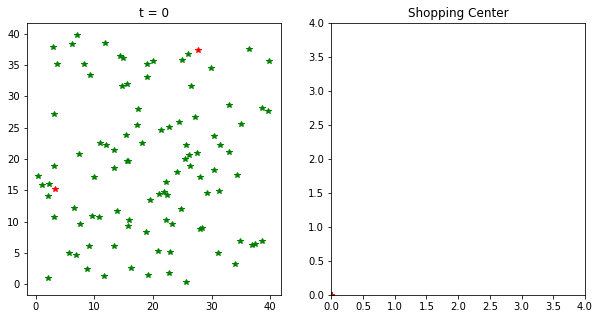

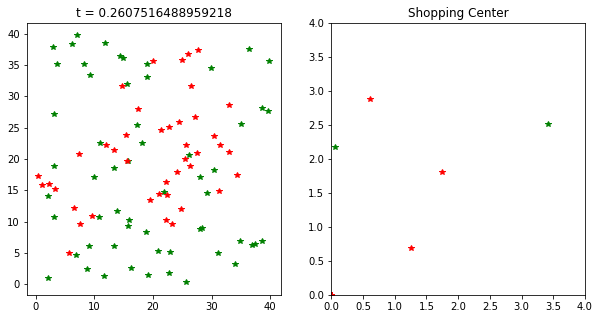

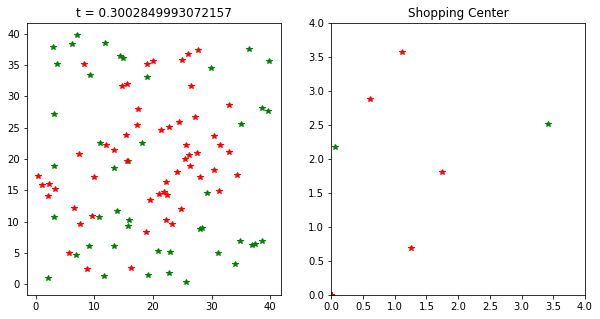

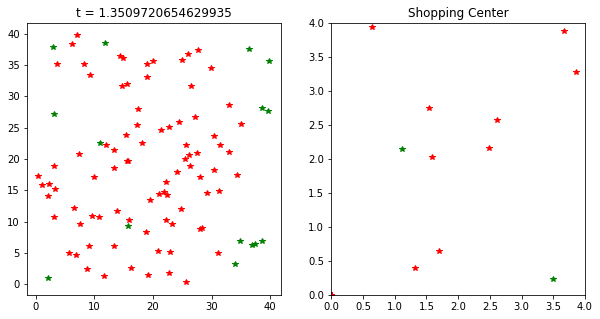

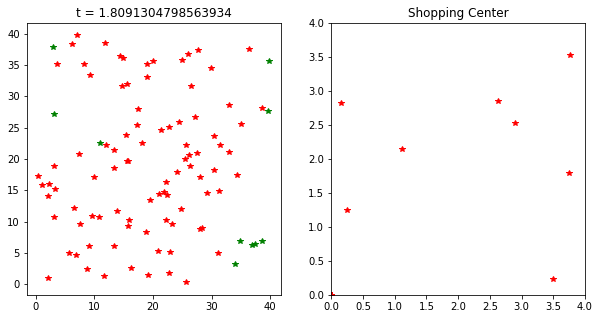

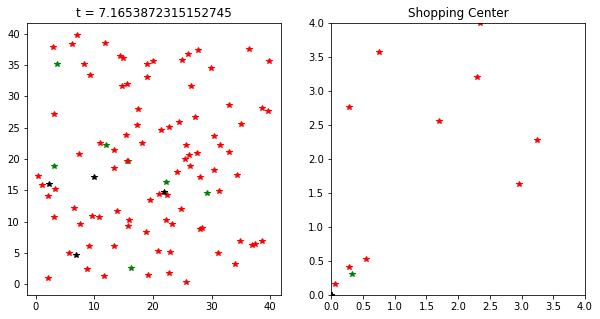

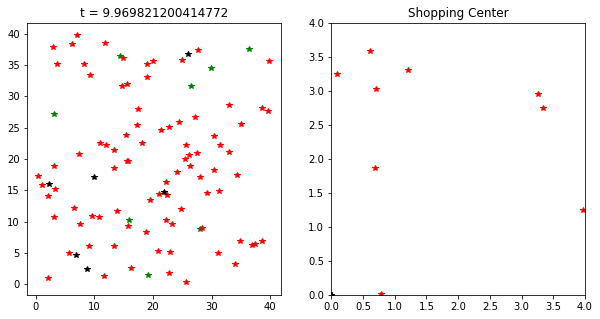

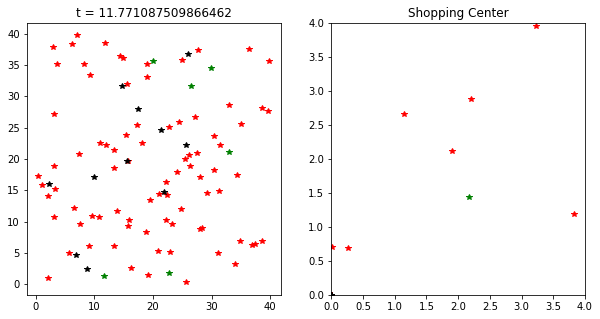

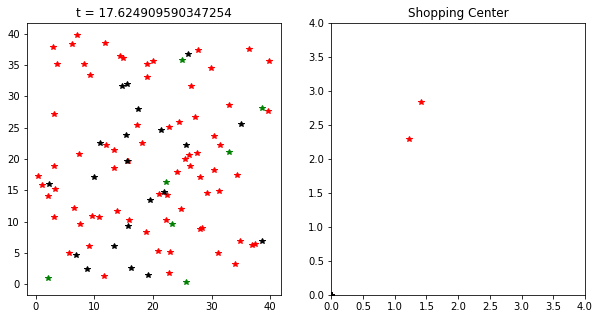

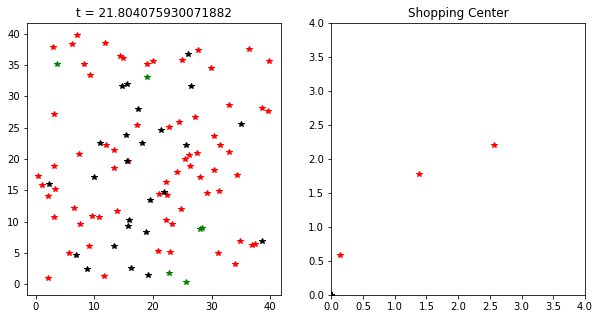

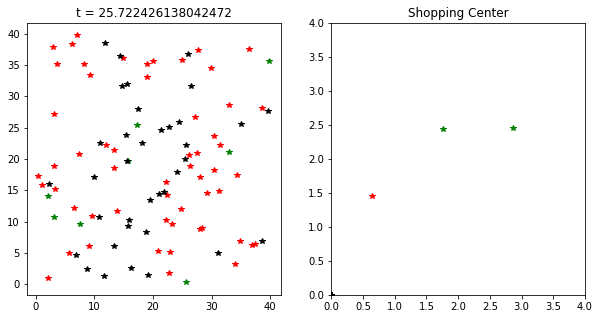

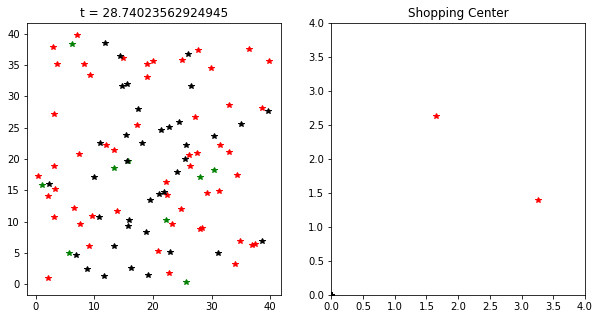

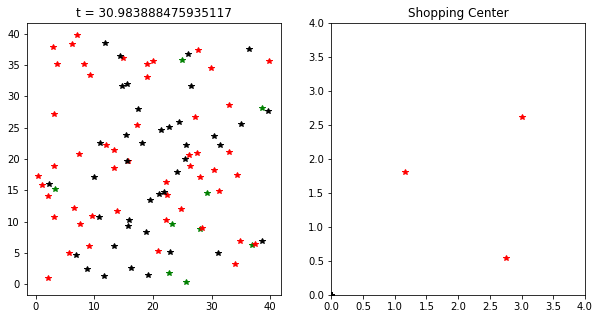

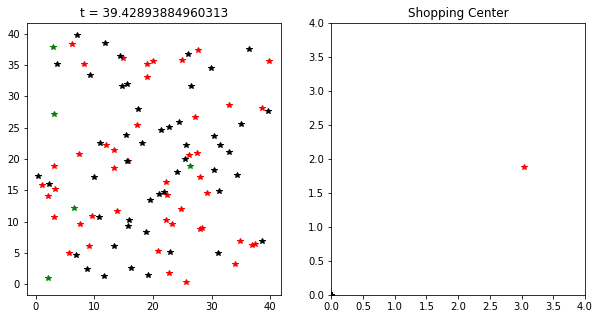

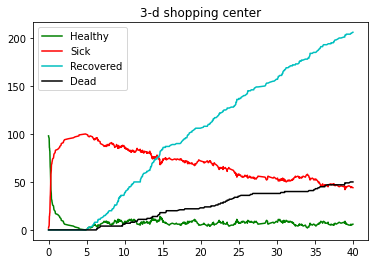

In [74]:
print(" ~~~~~~ 3-d shopping center (Geo, get sick after recovery, no Quarantine, 1 Shopping center) ")

# Initialize:
# We need a table to keep the records of the state of each person, 
# because locations matter:
people = DataFrame({'x': l * random.rand(n),
                    'y': l * random.rand(n),
                    'tS': [Infinity] * n,
                    'tRorD': [Infinity] * n,
                    'state': 'h',
                    'SC': [0] * n, # 1 if person is in shopping center
                    'x_SC': zeros(n),
                    'y_SC': zeros(n),
                    't_comeback': [Infinity] * n}) # comeback time
t = 0
ns = ni # Initial sick
nh = n - ns # Initial healthy and disease potential
nr = 0
nd = 0
# All the people who are h, s, r but not dead or in the Quarantine:
n_city_alive = n + 1 # +1 is a little change to prevent from becoming 0
tSC = t + random.exponential(scale=1/( n_city_alive * mu_g)) # Event of next going to shop
# Reporting Dataframe:
timeline = DataFrame({'t': [t],
                      'Healthy': nh,
                      'Sick': ns,
                      'Recovered':nr,
                      'Dead': nd})

# Assigning the initial sicks randomly:
init_sicks = [random.randint(n) for x in range(ns)]
for sick in init_sicks :
    people.loc[sick, 'state'] = 's'
    people.loc[sick, 'tRorD'] = a + (b - a)*random.uniform()
#

# Assigning the initial tS for each person:
for i in people[people['state'] == 'h'].index :
    mu_i = 0
    for j in people[people['state'] == 's'].index :
        mu_i += f1(people, i, j)
    if mu_i == 0 :
        people.loc[i, 'tS'] = Infinity
    else:
        people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))
#

while t < T :
    if t * 10000 // 1 % 79 == 0 : # Showing some snapshots of the population
        plt.figure(num=112, figsize=(10, 5) )
        plt.subplot(1, 2, 1)
        plt.plot(people.loc[people['state'] == 'h', 'x'], people.loc[people['state'] == 'h', 'y'], "g*")
        plt.plot(people.loc[people['state'] == 's', 'x'], people.loc[people['state'] == 's', 'y'], "r*")
        plt.plot(people.loc[people['state'] == 'r', 'x'], people.loc[people['state'] == 'r', 'y'], "c*")
        plt.plot(people.loc[people['state'] == 'd', 'x'], people.loc[people['state'] == 'd', 'y'], "k*")
        plt.title("t = " + str(t))
        plt.subplot(1, 2, 2)
        axes = plt.gca()
        axes.set_xlim([0, l_sc])
        axes.set_ylim([0, l_sc])
        plt.plot(people.loc[people['state'] == 'h', 'x_SC'], people.loc[people['state'] == 'h', 'y_SC'], "g*")
        plt.plot(people.loc[people['state'] == 's', 'x_SC'], people.loc[people['state'] == 's', 'y_SC'], "r*")
        plt.plot(people.loc[people['state'] == 'r', 'x_SC'], people.loc[people['state'] == 'r', 'y_SC'], "c*")
        plt.plot(people.loc[people['state'] == 'd', 'x_SC'], people.loc[people['state'] == 'd', 'y_SC'], "k*")
        plt.title("Shopping Center")
        plt.show()

    if tSC == min([min(people['tS']), min(people['tRorD']), tSC, min(people['t_comeback']), T]) :
        t = tSC
        n_city_alive -= 1
        goer_id = people.loc[people['state'] != 'd'].sample(1).index
        people.loc[goer_id, 'SC'] = 1
        people.loc[goer_id, 'x_SC'] = l_sc * random.rand(1)
        people.loc[goer_id, 'y_SC'] = l_sc * random.rand(1)
        people.loc[goer_id, 't_comeback'] = t + a_g + (b_g - a_g)*random.uniform()
        tSC = t + random.exponential(scale=1/( n_city_alive * mu_g)) # next tSC
        # Updating the tS for all the healthy people:
        if nh > 0 :
            for i in people[people['state'] == 'h'].index :
                if people.loc[i, 'SC'] == 0 :
                    mu_i = 0
                    for j in people[(people['state'] == 's') & (people['SC'] == 0)].index :
                        mu_i += f1(people, i, j)
                    if mu_i == 0 :
                        people.loc[i, 'tS'] = Infinity
                    else:
                        people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))
                if people.loc[i, 'SC'] == 1 :
                    mu_i = 0
                    for j in people[(people['state'] == 's') & (people['SC'] == 1)].index :
                        mu_i += f1_SC(people, i, j)
                    if mu_i == 0 :
                        people.loc[i, 'tS'] = Infinity
                    else:
                        people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))


    if min(people['t_comeback']) == min([min(people['tS']), min(people['tRorD']), tSC, min(people['t_comeback']), T]) :
        t = min(people['t_comeback'])
        n_city_alive += 1
        comer_id = people[ people['t_comeback'] == min(people['t_comeback'])].index
        people.loc[comer_id, 't_comeback'] = Infinity
        people.loc[comer_id, 'SC'] = 0
        people.loc[comer_id, 'x_SC'] = 0
        people.loc[comer_id, 'y_SC'] = 0
        tSC = t + random.exponential(scale=1/( n_city_alive * mu_g)) # next tSC
        # Updating the tS for all the healthy people:
        if nh > 0 :
            for i in people[people['state'] == 'h'].index :
                if people.loc[i, 'SC'] == 0 :
                    mu_i = 0
                    for j in people[(people['state'] == 's') & (people['SC'] == 0)].index :
                        mu_i += f1(people, i, j)
                    if mu_i == 0 :
                        people.loc[i, 'tS'] = Infinity
                    else:
                        people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))
                if people.loc[i, 'SC'] == 1 :
                    mu_i = 0
                    for j in people[(people['state'] == 's') & (people['SC'] == 1)].index :
                        mu_i += f1_SC(people, i, j)
                    if mu_i == 0 :
                        people.loc[i, 'tS'] = Infinity
                    else:
                        people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))


    if min(people['tS']) == min([min(people['tS']), min(people['tRorD']), tSC, min(people['t_comeback']), T]) :
        t = min(people['tS'])
        indx = people[ people['tS'] == min(people['tS'])].index
        nh -= 1
        ns += 1
        people.loc[indx, 'tS'] = Infinity
        people.loc[indx, 'state'] = 's'
        # Recording the recovery or death of this sick:
        tRorD = a + (b - a)*random.uniform()
        people.loc[indx, 'tRorD'] = t + tRorD
        # Recording the Healthy & Sick at t:
        timeline = timeline.append({'t': t,
                                    'Healthy': nh,
                                    'Sick': ns}, ignore_index=True)
        # Updating the tS for all the healthy people:
        if nh > 0 :
            for i in people[people['state'] == 'h'].index :
                if people.loc[i, 'SC'] == 0 :
                    mu_i = 0
                    for j in people[(people['state'] == 's') & (people['SC'] == 0)].index :
                        mu_i += f1(people, i, j)
                    if mu_i == 0 :
                        people.loc[i, 'tS'] = Infinity
                    else:
                        people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))
                if people.loc[i, 'SC'] == 1 :
                    mu_i = 0
                    for j in people[(people['state'] == 's') & (people['SC'] == 1)].index :
                        mu_i += f1_SC(people, i, j)
                    if mu_i == 0 :
                        people.loc[i, 'tS'] = Infinity
                    else:
                        people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))


    if min(people['tRorD']) == min([min(people['tS']), min(people['tRorD']), tSC, min(people['t_comeback']), T]) :
        t = min(people['tRorD'])
        indx = people[ people['tRorD'] == min(people['tRorD'])].index
        people.loc[indx, 'tRorD'] = Infinity
        u = random.uniform()
        if u < pr : # Someone recovers
            people.loc[indx, 'state'] = 'h'
            ns -= 1
            nr += 1
            nh += 1
            timeline = timeline.append({'t': t,
                                        'Sick': ns,
                                        'Recovered': nr,
                                        'Healthy': nh}, ignore_index=True)
        else: # Someone dies
            people.loc[indx, 'state'] = 'd'
            ns -= 1
            nd += 1
            n_city_alive -= 1
            # Removing him from shopping center:
            people.loc[indx, 'SC'] = 0
            people.loc[indx, 'x_SC'] = 0
            people.loc[indx, 'y_SC'] = 0
            people.loc[indx, 't_comeback'] = Infinity     
            #
            timeline = timeline.append({'t': t,
                                        'Sick': ns,
                                        'Dead': nd}, ignore_index=True)
        # Updating the tS for all the healthy people:
        if nh > 0 :
            for i in people[people['state'] == 'h'].index :
                if people.loc[i, 'SC'] == 0 :
                    mu_i = 0
                    for j in people[(people['state'] == 's') & (people['SC'] == 0)].index :
                        mu_i += f1(people, i, j)
                    if mu_i == 0 :
                        people.loc[i, 'tS'] = Infinity
                    else:
                        people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))
                if people.loc[i, 'SC'] == 1 :
                    mu_i = 0
                    for j in people[(people['state'] == 's') & (people['SC'] == 1)].index :
                        mu_i += f1_SC(people, i, j)
                    if mu_i == 0 :
                        people.loc[i, 'tS'] = Infinity
                    else:
                        people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))

    
    if T == min([min(people['tS']), min(people['tRorD']), tSC, min(people['t_comeback']), T]) :
        t = T
        break

# Filling the Reporting Dataframe:
# timeline.sort_values(by='t', inplace=True)
timeline = timeline.ffill()

plt.figure(11)
plt.plot(timeline['t'], timeline['Healthy'], "g-", label="Healthy")
plt.plot(timeline['t'], timeline['Sick'], "r-", label="Sick")
plt.plot(timeline['t'], timeline['Recovered'], "c-", label="Recovered")
plt.plot(timeline['t'], timeline['Dead'], "k-", label="Dead")
plt.legend()
plt.title("3-d shopping center")
plt.show()


 ~~~~~~ 3-d' shopping center (Geo, get sick after recovery, Quarantine, 1 Shopping center) 


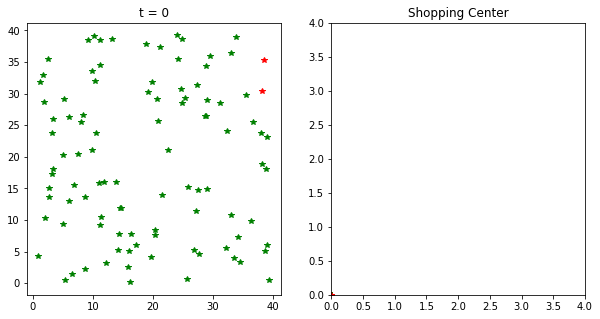

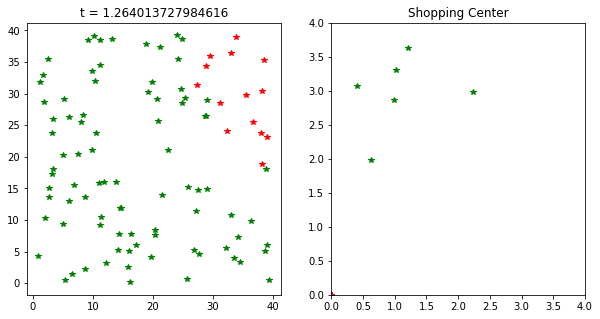

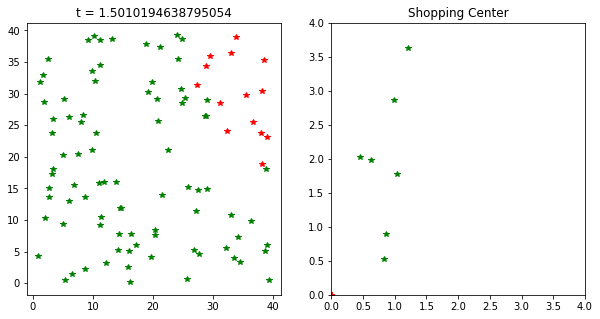

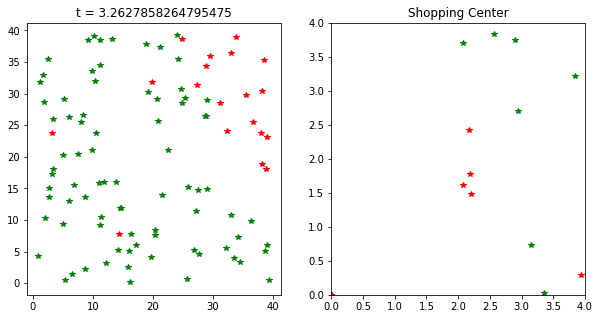

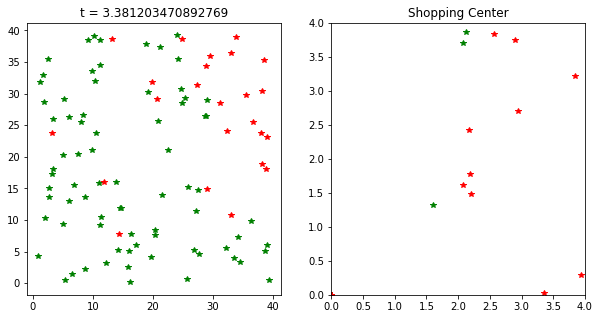

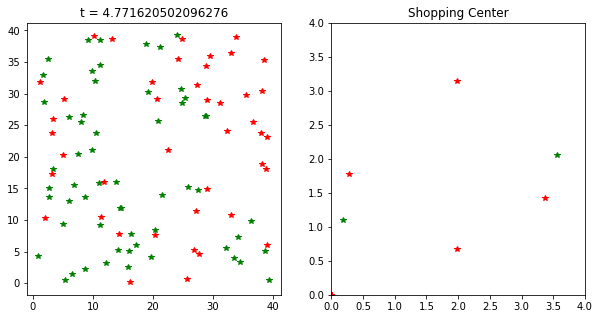

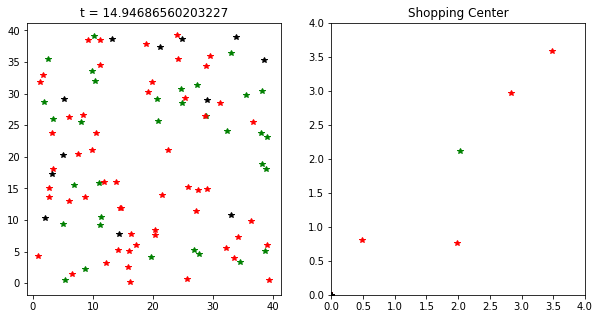

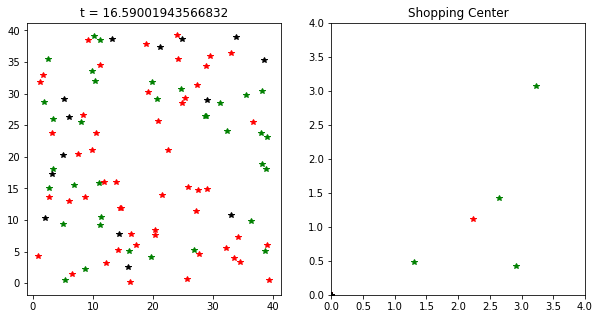

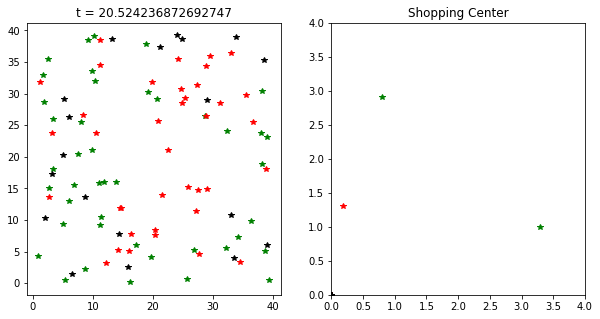

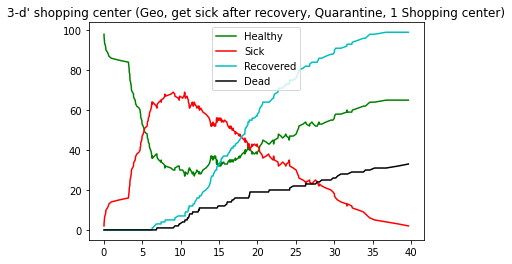

In [76]:
print(" ~~~~~~ 3-d' shopping center (Geo, get sick after recovery, Quarantine, 1 Shopping center) ")

# Initialize:
# We need a table to keep the records of the state of each person, 
# because locations matter:
people = DataFrame({'x': l * random.rand(n),
                    'y': l * random.rand(n),
                    'tS': [Infinity] * n,
                    'tRorD': [Infinity] * n,
                    'state': 'h',
                    'Quarantine': [0] * n,
                    'SC': [0] * n, # 1 if person is in shopping center
                    'x_SC': zeros(n),
                    'y_SC': zeros(n),
                    't_comeback': [Infinity] * n}) # comeback time
t = 0
ns = ni # Initial sick
nh = n - ns # Initial healthy and disease potential
nr = 0
nd = 0
# All the people who are h, s, r but not dead or in the Quarantine:
n_city_alive = n + 1 # +1 has little effect but prevents from becoming 0
# Event of next going to shop
tSC = t + random.exponential(scale=1/( n_city_alive * mu_g))
# Reporting Dataframe:
timeline = DataFrame({'t': [t],
                      'Healthy': nh,
                      'Sick': ns,
                      'Recovered':nr,
                      'Dead': nd})

# Assigning the initial sicks randomly:
init_sicks = [random.randint(n) for x in range(ns)]
for sick in init_sicks :
    people.loc[sick, 'state'] = 's'
    people.loc[sick, 'tRorD'] = a + (b - a)*random.uniform()
#

# Assigning the initial tS for each person:
for i in people[people['state'] == 'h'].index :
    mu_i = 0
    for j in people[people['state'] == 's'].index :
        mu_i += f1(people, i, j)
    if mu_i == 0 :
        people.loc[i, 'tS'] = Infinity
    else:
        people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))
#

while t < T :
    if t * 10000 // 1 % 79 == 0 : # Showing some snapshots of the population
        plt.figure(num=112, figsize=(10, 5) )
        plt.subplot(1, 2, 1)
        plt.plot(people.loc[people['state'] == 'h', 'x'], people.loc[people['state'] == 'h', 'y'], "g*")
        plt.plot(people.loc[people['state'] == 's', 'x'], people.loc[people['state'] == 's', 'y'], "r*")
        plt.plot(people.loc[people['state'] == 'r', 'x'], people.loc[people['state'] == 'r', 'y'], "c*")
        plt.plot(people.loc[people['state'] == 'd', 'x'], people.loc[people['state'] == 'd', 'y'], "k*")
        plt.title("t = " + str(t))

        plt.subplot(1, 2, 2)
        axes = plt.gca()
        axes.set_xlim([0, l_sc])
        axes.set_ylim([0, l_sc])
        plt.plot(people.loc[people['state'] == 'h', 'x_SC'], people.loc[people['state'] == 'h', 'y_SC'], "g*")
        plt.plot(people.loc[people['state'] == 's', 'x_SC'], people.loc[people['state'] == 's', 'y_SC'], "r*")
        plt.plot(people.loc[people['state'] == 'r', 'x_SC'], people.loc[people['state'] == 'r', 'y_SC'], "c*")
        plt.plot(people.loc[people['state'] == 'd', 'x_SC'], people.loc[people['state'] == 'd', 'y_SC'], "k*")
        plt.title("Shopping Center")
        plt.show()

    if tSC == min([min(people['tS']), min(people['tRorD']), tSC, min(people['t_comeback']), T]) :
        t = tSC
        n_city_alive -= 1
        goer_id = people.loc[(people['state'] != 'd')&(people['Quarantine'] == 0)].sample(1).index
        people.loc[goer_id, 'SC'] = 1
        people.loc[goer_id, 'x_SC'] = l_sc * random.rand(1)
        people.loc[goer_id, 'y_SC'] = l_sc * random.rand(1)
        people.loc[goer_id, 't_comeback'] = t + a_g + (b_g - a_g)*random.uniform()
        tSC = t + random.exponential(scale=1/( n_city_alive * mu_g)) # next tSC
        # Updating the tS for all the healthy people:
        if nh > 0 :
            for i in people[people['state'] == 'h'].index :
                if people.loc[i, 'SC'] == 0 :
                    mu_i = 0
                    for j in people[(people['state'] == 's') & (people['SC'] == 0)].index :
                        if people.loc[j, 'Quarantine'] == 0 :
                            mu_i += f1(people, i, j)
                    if mu_i == 0 :
                        people.loc[i, 'tS'] = Infinity
                    else:
                        people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))
                if people.loc[i, 'SC'] == 1 :
                    mu_i = 0
                    for j in people[(people['state'] == 's') & (people['SC'] == 1)].index :
                        mu_i += f1_SC(people, i, j)
                    if mu_i == 0 :
                        people.loc[i, 'tS'] = Infinity
                    else:
                        people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))


    if min(people['t_comeback']) == min([min(people['tS']), min(people['tRorD']), tSC, min(people['t_comeback']), T]) :
        t = min(people['t_comeback'])
        n_city_alive += 1
        comer_id = people[ people['t_comeback'] == min(people['t_comeback'])].index
        people.loc[comer_id, 't_comeback'] = Infinity
        people.loc[comer_id, 'SC'] = 0
        people.loc[comer_id, 'x_SC'] = 0
        people.loc[comer_id, 'y_SC'] = 0
        tSC = t + random.exponential(scale=1/( n_city_alive * mu_g)) # next tSC
        # Updating the tS for all the healthy people:
        if nh > 0 :
            for i in people[people['state'] == 'h'].index :
                if people.loc[i, 'SC'] == 0 :
                    mu_i = 0
                    for j in people[(people['state'] == 's') & (people['SC'] == 0)].index :
                        if people.loc[j, 'Quarantine'] == 0 :
                            mu_i += f1(people, i, j)
                    if mu_i == 0 :
                        people.loc[i, 'tS'] = Infinity
                    else:
                        people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))
                if people.loc[i, 'SC'] == 1 :
                    mu_i = 0
                    for j in people[(people['state'] == 's') & (people['SC'] == 1)].index :
                        mu_i += f1_SC(people, i, j)
                    if mu_i == 0 :
                        people.loc[i, 'tS'] = Infinity
                    else:
                        people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))


    if min(people['tS']) == min([min(people['tS']), min(people['tRorD']), tSC, min(people['t_comeback']), T]) :
        t = min(people['tS'])
        indx = people[ people['tS'] == min(people['tS'])].index
        nh -= 1
        ns += 1
        people.loc[indx, 'tS'] = Infinity
        people.loc[indx, 'state'] = 's'
        # Going to Quarantine? *****
        u = random.uniform()
        if u < pQ :
            people.loc[indx, 'Quarantine'] = 1
            n_city_alive -= 1
        # Recording the recovery or death of this sick:
        tRorD = a + (b - a)*random.uniform()
        people.loc[indx, 'tRorD'] = t + tRorD
        # Recording the Healthy & Sick at t:
        timeline = timeline.append({'t': t,
                                    'Healthy': nh,
                                    'Sick': ns}, ignore_index=True)
        # Updating the tS for all the healthy people:
        if nh > 0 :
            for i in people[people['state'] == 'h'].index :
                if people.loc[i, 'SC'] == 0 :
                    mu_i = 0
                    for j in people[(people['state'] == 's') & (people['SC'] == 0)].index :
                        if people.loc[j, 'Quarantine'] == 0 :
                            mu_i += f1(people, i, j)
                    if mu_i == 0 :
                        people.loc[i, 'tS'] = Infinity
                    else:
                        people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))
                if people.loc[i, 'SC'] == 1 :
                    mu_i = 0
                    for j in people[(people['state'] == 's') & (people['SC'] == 1)].index :
                        mu_i += f1_SC(people, i, j)
                    if mu_i == 0 :
                        people.loc[i, 'tS'] = Infinity
                    else:
                        people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))


    if min(people['tRorD']) == min([min(people['tS']), min(people['tRorD']), tSC, min(people['t_comeback']), T]) :
        t = min(people['tRorD'])
        indx = people[ people['tRorD'] == min(people['tRorD'])].index
        people.loc[indx, 'tRorD'] = Infinity
        u = random.uniform()
        if u < pr : # Someone recovers
            people.loc[indx, 'state'] = 'h'
            if array(people.loc[indx ,'Quarantine']) == 1 :
                people.loc[indx, 'Quarantine'] = 0 # *****
                n_city_alive += 1
            ns -= 1
            nr += 1
            nh += 1
            timeline = timeline.append({'t': t,
                                        'Sick': ns,
                                        'Recovered': nr,
                                        'Healthy': nh}, ignore_index=True)
        else: # Someone dies
            people.loc[indx, 'state'] = 'd'
            ns -= 1
            nd += 1
            n_city_alive -= 1
            # Removing him from shopping center:
            people.loc[indx, 'SC'] = 0
            people.loc[indx, 'x_SC'] = 0
            people.loc[indx, 'y_SC'] = 0
            people.loc[indx, 't_comeback'] = Infinity     
            #
            timeline = timeline.append({'t': t,
                                        'Sick': ns,
                                        'Dead': nd}, ignore_index=True)
        # Updating the tS for all the healthy people:
        if nh > 0 :
            for i in people[people['state'] == 'h'].index :
                if people.loc[i, 'SC'] == 0 :
                    mu_i = 0
                    for j in people[(people['state'] == 's') & (people['SC'] == 0)].index :
                        if people.loc[j, 'Quarantine'] == 0 :
                            mu_i += f1(people, i, j)
                    if mu_i == 0 :
                        people.loc[i, 'tS'] = Infinity
                    else:
                        people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))
                if people.loc[i, 'SC'] == 1 :
                    mu_i = 0
                    for j in people[(people['state'] == 's') & (people['SC'] == 1)].index :
                        mu_i += f1_SC(people, i, j)
                    if mu_i == 0 :
                        people.loc[i, 'tS'] = Infinity
                    else:
                        people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))

    
    if T == min([min(people['tS']), min(people['tRorD']), tSC, min(people['t_comeback']), T]) :
        t = T
        break

# Filling the Reporting Dataframe:
# timeline.sort_values(by='t', inplace=True)
timeline = timeline.ffill()

plt.figure(11)
plt.plot(timeline['t'], timeline['Healthy'], "g-", label="Healthy")
plt.plot(timeline['t'], timeline['Sick'], "r-", label="Sick")
plt.plot(timeline['t'], timeline['Recovered'], "c-", label="Recovered")
plt.plot(timeline['t'], timeline['Dead'], "k-", label="Dead")
plt.legend()
plt.title("3-d' shopping center (Geo, get sick after recovery, Quarantine, 1 Shopping center)")
plt.show()


 ~~~~~~ 3-e (Geo, get sick after recovery, Quarantine, 1 Shopping center) 


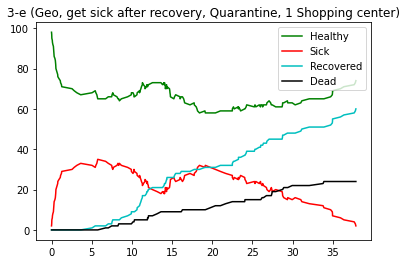

In [77]:
print(" ~~~~~~ 3-e (Geo, get sick after recovery, Quarantine, 1 Shopping center) ")

# Initialize:
# We need a table to keep the records of the state of each person, 
# because locations matter:
people = DataFrame({'x': l * random.rand(n),
                    'y': l * random.rand(n),
                    'tS': [Infinity] * n,
                    'tRorD': [Infinity] * n,
                    'state': 'h',
                    'Quarantine': [0] * n,
                    'SC': [0] * n, # 1 or more if person is in shopping center
                    'x_SC': zeros(n),
                    'y_SC': zeros(n),
                    't_comeback': [Infinity] * n}) # comeback time
t = 0
ns = ni # Initial sick
nh = n - ns # Initial healthy and disease potential
nr = 0
nd = 0
# All the people who are h, s, r but not dead or in the Quarantine:
n_city_alive = n + 1 # +1 has little effect but prevents from becoming 0
# Event of next going to shop
tSC = t + random.exponential(scale=1/( n_city_alive * mu_g))
# Reporting Dataframe:
timeline = DataFrame({'t': [t],
                      'Healthy': nh,
                      'Sick': ns,
                      'Recovered':nr,
                      'Dead': nd})

# Assigning the initial sicks randomly:
init_sicks = [random.randint(n) for x in range(ns)]
for sick in init_sicks :
    people.loc[sick, 'state'] = 's'
    people.loc[sick, 'tRorD'] = a + (b - a)*random.uniform()
#

# Assigning the initial tS for each person:
for i in people[people['state'] == 'h'].index :
    mu_i = 0
    for j in people[people['state'] == 's'].index :
        mu_i += f1(people, i, j)
    if mu_i == 0 :
        people.loc[i, 'tS'] = Infinity
    else:
        people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))
#

while t < T :
    if tSC == min([min(people['tS']), min(people['tRorD']), tSC, min(people['t_comeback']), T]) :
        t = tSC
        n_city_alive -= 1
        goer_id = people.loc[(people['state'] != 'd')&(people['Quarantine'] == 0)].sample(1).index
        SC_id = 1 + random.randint(0, NSC)          ####
        people.loc[goer_id, 'SC'] = SC_id         ####
        people.loc[goer_id, 'x_SC'] = l_NSC[SC_id - 1] * random.rand(1)
        people.loc[goer_id, 'y_SC'] = l_NSC[SC_id - 1] * random.rand(1)
        people.loc[goer_id, 't_comeback'] = t + a_g + (b_g - a_g)*random.uniform()
        tSC = t + random.exponential(scale=1/( n_city_alive * mu_g)) # next tSC
        # Updating the tS for all the healthy people:
        if nh > 0 :
            for i in people[people['state'] == 'h'].index :
                shop = people.loc[i, 'SC']                    ####
                if shop == 0 : # shop 0 is the main area
                    mu_i = 0
                    for j in people[(people['state'] == 's') & (people['SC'] == 0)].index :
                        if people.loc[j, 'Quarantine'] == 0 :
                            mu_i += f1(people, i, j)
                    if mu_i == 0 :
                        people.loc[i, 'tS'] = Infinity
                    else:
                        people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))
                else :
                    mu_i = 0
                    for j in people[(people['state'] == 's') & (people['SC'] == shop)].index :
                        mu_i += f1_SC(people, i, j)
                    if mu_i == 0 :
                        people.loc[i, 'tS'] = Infinity
                    else:
                        people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))


    if min(people['t_comeback']) == min([min(people['tS']), min(people['tRorD']), tSC, min(people['t_comeback']), T]) :
        t = min(people['t_comeback'])
        n_city_alive += 1
        comer_id = people[ people['t_comeback'] == min(people['t_comeback'])].index
        people.loc[comer_id, 't_comeback'] = Infinity
        people.loc[comer_id, 'SC'] = 0
        people.loc[comer_id, 'x_SC'] = 0
        people.loc[comer_id, 'y_SC'] = 0
        tSC = t + random.exponential(scale=1/( n_city_alive * mu_g)) # next tSC
        # Updating the tS for all the healthy people:
        if nh > 0 :
            for i in people[people['state'] == 'h'].index :
                shop = people.loc[i, 'SC']                    ####
                if shop == 0 : # shop 0 is the main area
                    mu_i = 0
                    for j in people[(people['state'] == 's') & (people['SC'] == 0)].index :
                        if people.loc[j, 'Quarantine'] == 0 :
                            mu_i += f1(people, i, j)
                    if mu_i == 0 :
                        people.loc[i, 'tS'] = Infinity
                    else:
                        people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))
                else :
                    mu_i = 0
                    for j in people[(people['state'] == 's') & (people['SC'] == shop)].index :
                        mu_i += f1_SC(people, i, j)
                    if mu_i == 0 :
                        people.loc[i, 'tS'] = Infinity
                    else:
                        people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))


    if min(people['tS']) == min([min(people['tS']), min(people['tRorD']), tSC, min(people['t_comeback']), T]) :
        t = min(people['tS'])
        indx = people[ people['tS'] == min(people['tS'])].index
        nh -= 1
        ns += 1
        people.loc[indx, 'tS'] = Infinity
        people.loc[indx, 'state'] = 's'
        # Going to Quarantine? *****
        u = random.uniform()
        if u < pQ :
            people.loc[indx, 'Quarantine'] = 1
            n_city_alive -= 1
        # Recording the recovery or death of this sick:
        tRorD = a + (b - a)*random.uniform()
        people.loc[indx, 'tRorD'] = t + tRorD
        # Recording the Healthy & Sick at t:
        timeline = timeline.append({'t': t,
                                    'Healthy': nh,
                                    'Sick': ns}, ignore_index=True)
        # Updating the tS for all the healthy people:
        if nh > 0 :
            for i in people[people['state'] == 'h'].index :
                shop = people.loc[i, 'SC']                    ####
                if shop == 0 : # shop 0 is the main area
                    mu_i = 0
                    for j in people[(people['state'] == 's') & (people['SC'] == 0)].index :
                        if people.loc[j, 'Quarantine'] == 0 :
                            mu_i += f1(people, i, j)
                    if mu_i == 0 :
                        people.loc[i, 'tS'] = Infinity
                    else:
                        people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))
                else :
                    mu_i = 0
                    for j in people[(people['state'] == 's') & (people['SC'] == shop)].index :
                        mu_i += f1_SC(people, i, j)
                    if mu_i == 0 :
                        people.loc[i, 'tS'] = Infinity
                    else:
                        people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))


    if min(people['tRorD']) == min([min(people['tS']), min(people['tRorD']), tSC, min(people['t_comeback']), T]) :
        t = min(people['tRorD'])
        indx = people[ people['tRorD'] == min(people['tRorD'])].index
        people.loc[indx, 'tRorD'] = Infinity
        u = random.uniform()
        if u < pr : # Someone recovers
            people.loc[indx, 'state'] = 'h'
            if  array( people.loc[indx ,'Quarantine']) == 1 :
                people.loc[indx, 'Quarantine'] = 0 # *****
                n_city_alive += 1
            ns -= 1
            nr += 1
            nh += 1
            timeline = timeline.append({'t': t,
                                        'Sick': ns,
                                        'Recovered': nr,
                                        'Healthy': nh}, ignore_index=True)
        else: # Someone dies
            people.loc[indx, 'state'] = 'd'
            ns -= 1
            nd += 1
            n_city_alive -= 1
            # Removing him from shopping center:
            people.loc[indx, 'SC'] = 0
            people.loc[indx, 'x_SC'] = 0
            people.loc[indx, 'y_SC'] = 0
            people.loc[indx, 't_comeback'] = Infinity     
            #
            timeline = timeline.append({'t': t,
                                        'Sick': ns,
                                        'Dead': nd}, ignore_index=True)
        # Updating the tS for all the healthy people:
        if nh > 0 :
            for i in people[people['state'] == 'h'].index :
                shop = people.loc[i, 'SC']                    ####
                if shop == 0 : # shop 0 is the main area
                    mu_i = 0
                    for j in people[(people['state'] == 's') & (people['SC'] == 0)].index :
                        if people.loc[j, 'Quarantine'] == 0 :
                            mu_i += f1(people, i, j)
                    if mu_i == 0 :
                        people.loc[i, 'tS'] = Infinity
                    else:
                        people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))
                else :
                    mu_i = 0
                    for j in people[(people['state'] == 's') & (people['SC'] == shop)].index :
                        mu_i += f1_SC(people, i, j)
                    if mu_i == 0 :
                        people.loc[i, 'tS'] = Infinity
                    else:
                        people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))

    
    if T == min([min(people['tS']), min(people['tRorD']), tSC, min(people['t_comeback']), T]) :
        t = T
        break

# Filling the Reporting Dataframe:
# timeline.sort_values(by='t', inplace=True)
timeline = timeline.ffill()

plt.figure(11)
plt.plot(timeline['t'], timeline['Healthy'], "g-", label="Healthy")
plt.plot(timeline['t'], timeline['Sick'], "r-", label="Sick")
plt.plot(timeline['t'], timeline['Recovered'], "c-", label="Recovered")
plt.plot(timeline['t'], timeline['Dead'], "k-", label="Dead")
plt.legend()
plt.title("3-e (Geo, get sick after recovery, Quarantine, 1 Shopping center)")
plt.show()


 ~~~~~~ 3-e' (Geo, get sick after recovery, no Quarantine, NSC Shopping centers) 


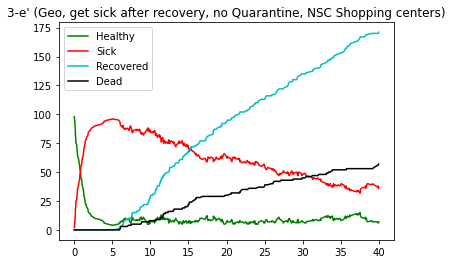

In [78]:
## e)
print(" ~~~~~~ 3-e' (Geo, get sick after recovery, no Quarantine, NSC Shopping centers) ")

# Initialize:
# We need a table to keep the records of the state of each person, 
# because locations matter:
people = DataFrame({'x': l * random.rand(n),
                    'y': l * random.rand(n),
                    'tS': [Infinity] * n,
                    'tRorD': [Infinity] * n,
                    'state': 'h',
                    'SC': [0] * n, # 1 or more if person is in shopping center
                    'x_SC': zeros(n),
                    'y_SC': zeros(n),
                    't_comeback': [Infinity] * n}) # comeback time
t = 0
ns = ni # Initial sick number
nh = n - ns # Initial healthy and disease potential
nr = 0
nd = 0
# All the people who are h, s, r but not dead or in the Quarantine:
n_city_alive = n + 1 # +1 is a little change to prevent from becoming 0
tSC = t + random.exponential(scale=1/( n_city_alive * mu_g)) # Event of next going to shop
# Reporting Dataframe:
timeline = DataFrame({'t': [t],
                      'Healthy': nh,
                      'Sick': ns,
                      'Recovered':nr,
                      'Dead': nd})

# Assigning the initial sicks randomly:
init_sicks = [random.randint(n) for x in range(ns)]
for sick in init_sicks :
    people.loc[sick, 'state'] = 's'
    people.loc[sick, 'tRorD'] = a + (b - a)*random.uniform()
#

# Assigning the initial tS for each person:
for i in people[people['state'] == 'h'].index :
    mu_i = 0
    for j in people[people['state'] == 's'].index :
        mu_i += f1(people, i, j)
    if mu_i == 0 :
        people.loc[i, 'tS'] = Infinity
    else:
        people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))
#

while t < T :

    if tSC == min([min(people['tS']), min(people['tRorD']), tSC, min(people['t_comeback']), T]) :
        t = tSC
        n_city_alive -= 1
        goer_id = people.loc[people['state'] != 'd'].sample(1).index
        SC_id = 1 + random.randint(0, NSC)          ####
        people.loc[goer_id, 'SC'] = SC_id         ####
        people.loc[goer_id, 'x_SC'] = l_NSC[SC_id - 1] * random.rand(1)
        people.loc[goer_id, 'y_SC'] = l_NSC[SC_id - 1] * random.rand(1)
        people.loc[goer_id, 't_comeback'] = t + a_g + (b_g - a_g)*random.uniform()
        tSC = t + random.exponential(scale=1/( n_city_alive * mu_g)) # next tSC
        # Updating the tS for all the healthy people:
        if nh > 0 :
            for i in people[people['state'] == 'h'].index :
                shop = people.loc[i, 'SC']                    ####
                if shop == 0 : # shop 0 is the main area
                    mu_i = 0
                    for j in people[(people['state'] == 's') & (people['SC'] == 0)].index :
                        mu_i += f1(people, i, j)
                    if mu_i == 0 :
                        people.loc[i, 'tS'] = Infinity
                    else:
                        people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))
                else :
                    mu_i = 0
                    for j in people[(people['state'] == 's') & (people['SC'] == shop)].index :
                        mu_i += f1_SC(people, i, j)
                    if mu_i == 0 :
                        people.loc[i, 'tS'] = Infinity
                    else:
                        people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))


    if min(people['t_comeback']) == min([min(people['tS']), min(people['tRorD']), tSC, min(people['t_comeback']), T]) :
        t = min(people['t_comeback'])
        n_city_alive += 1
        comer_id = people[ people['t_comeback'] == min(people['t_comeback'])].index
        people.loc[comer_id, 't_comeback'] = Infinity
        people.loc[comer_id, 'SC'] = 0
        people.loc[comer_id, 'x_SC'] = 0
        people.loc[comer_id, 'y_SC'] = 0
        tSC = t + random.exponential(scale=1/( n_city_alive * mu_g)) # next tSC
        # Updating the tS for all the healthy people:
        if nh > 0 :
            for i in people[people['state'] == 'h'].index :
                shop = people.loc[i, 'SC']                    ####
                if shop == 0 : # shop 0 is the main area
                    mu_i = 0
                    for j in people[(people['state'] == 's') & (people['SC'] == 0)].index :
                        mu_i += f1(people, i, j)
                    if mu_i == 0 :
                        people.loc[i, 'tS'] = Infinity
                    else:
                        people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))
                else :
                    mu_i = 0
                    for j in people[(people['state'] == 's') & (people['SC'] == shop)].index :
                        mu_i += f1_SC(people, i, j)
                    if mu_i == 0 :
                        people.loc[i, 'tS'] = Infinity
                    else:
                        people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))


    if min(people['tS']) == min([min(people['tS']), min(people['tRorD']), tSC, min(people['t_comeback']), T]) :
        t = min(people['tS'])
        indx = people[ people['tS'] == min(people['tS'])].index
        nh -= 1
        ns += 1
        people.loc[indx, 'tS'] = Infinity
        people.loc[indx, 'state'] = 's'
        # Recording the recovery or death of this sick:
        tRorD = a + (b - a)*random.uniform()
        people.loc[indx, 'tRorD'] = t + tRorD
        # Recording the Healthy & Sick at t:
        timeline = timeline.append({'t': t,
                                    'Healthy': nh,
                                    'Sick': ns}, ignore_index=True)
        # Updating the tS for all the healthy people:
        if nh > 0 :
            for i in people[people['state'] == 'h'].index :
                shop = people.loc[i, 'SC']                    ####
                if shop == 0 : # shop 0 is the main area
                    mu_i = 0
                    for j in people[(people['state'] == 's') & (people['SC'] == 0)].index :
                        mu_i += f1(people, i, j)
                    if mu_i == 0 :
                        people.loc[i, 'tS'] = Infinity
                    else:
                        people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))
                else :
                    mu_i = 0
                    for j in people[(people['state'] == 's') & (people['SC'] == shop)].index :
                        mu_i += f1_SC(people, i, j)
                    if mu_i == 0 :
                        people.loc[i, 'tS'] = Infinity
                    else:
                        people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))


    if min(people['tRorD']) == min([min(people['tS']), min(people['tRorD']), tSC, min(people['t_comeback']), T]) :
        t = min(people['tRorD'])
        indx = people[ people['tRorD'] == min(people['tRorD'])].index
        people.loc[indx, 'tRorD'] = Infinity
        u = random.uniform()
        if u < pr : # Someone recovers
            people.loc[indx, 'state'] = 'h'
            ns -= 1
            nr += 1
            nh += 1
            timeline = timeline.append({'t': t,
                                        'Sick': ns,
                                        'Recovered': nr,
                                        'Healthy': nh}, ignore_index=True)
        else: # Someone dies
            people.loc[indx, 'state'] = 'd'
            ns -= 1
            nd += 1
            n_city_alive -= 1
            # Removing him from shopping center:
            people.loc[indx, 'SC'] = 0
            people.loc[indx, 'x_SC'] = 0
            people.loc[indx, 'y_SC'] = 0
            people.loc[indx, 't_comeback'] = Infinity     
            #
            timeline = timeline.append({'t': t,
                                        'Sick': ns,
                                        'Dead': nd}, ignore_index=True)
        # Updating the tS for all the healthy people:
        if nh > 0 :
            for i in people[people['state'] == 'h'].index :
                shop = people.loc[i, 'SC']                    ####
                if shop == 0 : # shop 0 is the main area
                    mu_i = 0
                    for j in people[(people['state'] == 's') & (people['SC'] == 0)].index :
                        mu_i += f1(people, i, j)
                    if mu_i == 0 :
                        people.loc[i, 'tS'] = Infinity
                    else:
                        people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))
                else :
                    mu_i = 0
                    for j in people[(people['state'] == 's') & (people['SC'] == shop)].index :
                        mu_i += f1_SC(people, i, j)
                    if mu_i == 0 :
                        people.loc[i, 'tS'] = Infinity
                    else:
                        people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))

    
    if T == min([min(people['tS']), min(people['tRorD']), tSC, min(people['t_comeback']), T]) :
        t = T
        break

# Filling the Reporting Dataframe:
# timeline.sort_values(by='t', inplace=True)
timeline = timeline.ffill()

plt.figure(11)
plt.plot(timeline['t'], timeline['Healthy'], "g-", label="Healthy")
plt.plot(timeline['t'], timeline['Sick'], "r-", label="Sick")
plt.plot(timeline['t'], timeline['Recovered'], "c-", label="Recovered")
plt.plot(timeline['t'], timeline['Dead'], "k-", label="Dead")
plt.legend()
plt.title("3-e' (Geo, get sick after recovery, no Quarantine, NSC Shopping centers)")
plt.show()


## Part 4: people going to work

Suppose we have nw workplaces, each of which is square. The size of these squares comes from a distribution such as Fws and the number of employees in the Fwn distribution, which may be independent or positively correlated. The total number of employees in the community is called nw. The number of these jobs and the distribution of the number of employees is such that on average two thirds of the society is employed. Suppose these nw are randomly selected from all members of the community.

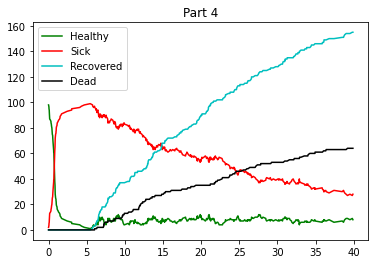

In [79]:


# Initialize:

# Array of workplaces' lengths: random between 1 to 3
L = array([1 + 2 * random.rand() for x in range(w)])
# Total No of workers between 1/3 & 2/3 :
nw = (1/3 + random.rand() * 1/3) * n
# Array of workplaces' No of workers: random between 0 to nw
NW_i = array([random.rand() for x in range(w)])
NW_i = NW_i / NW_i.sum()
NW_i = floor(NW_i * nw)
# Workplaces' start times fraction of day:
S_i = array([a_b + (b_b - a_b) * random.rand() for x in range(w)])
# Workplaces' end times fraction of day:
T_i = array([a_e + (b_e - a_e) * random.rand() for x in range(w)])

# We need a table to keep the records of the state of each person, 
# because locations matter:
people = DataFrame({'x': l * random.rand(n),
                    'y': l * random.rand(n),
                    'tS': [Infinity] * n,
                    'tRorD': [Infinity] * n,
                    'state': 'h',
                    'Workplace_id': [0] * n, #Constant, 1 or more if person works for a company
                    'current_place_id': [0] * n,
                    'x_Work': zeros(n),
                    'y_Work': zeros(n)
                    #'t_comeback': [Infinity] * n
                    })
    
t = 0
day = 0 # To add Workplaces' start & end time fractions, everyday
ns = ni # Initial sick number
nh = n - ns # Initial healthy and disease potential
nr = 0
nd = 0
# All the people who are h, s, r but not dead and not at work:
n_city_alive = n + 1 # +1 is a little change to prevent from becoming 0

#tSC = t + random.exponential(scale=1/( n_city_alive * mu_g)) # Event of next going to shop

# Assigning company ids & working hours to nw people:
for i in range(w):
    for x in range(int(NW_i[i])):
        j = people.loc[people['Workplace_id'] == 0].sample(1).index
        people.loc[j, 'Workplace_id'] = i + 1
        people.loc[j, 's_i'] = day + S_i[i] # Workplaces' start time
        people.loc[j, 't_i'] = day + T_i[i] # Workplaces'  end  time
        
# Reporting Dataframe:
timeline = DataFrame({'t': [t],
                      'Healthy': nh,
                      'Sick': ns,
                      'Recovered':nr,
                      'Dead': nd})

# Assigning the initial sicks randomly:
init_sicks = [random.randint(n) for x in range(ns)]
for sick in init_sicks :
    people.loc[sick, 'state'] = 's'
    people.loc[sick, 'tRorD'] = a + (b - a)*random.uniform()
#

# Assigning the initial tS for each person:
for i in people[people['state'] == 'h'].index :
    mu_i = 0
    for j in people[people['state'] == 's'].index :
        mu_i += f1(people, i, j)
    if mu_i == 0 :
        people.loc[i, 'tS'] = Infinity
    else:
        people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))
#

while t < T :
    
    if nanmin(people['s_i']) == nanmin([nanmin(people['tS']), nanmin(people['tRorD']), nanmin(people['s_i']), nanmin(people['t_i']), T]) :
        # DONE
        t = nanmin(people['s_i'])
        # Who are going? :
        goer_ids = people[ people['s_i'] == nanmin(people['s_i'])].index
        Workplace_id = people.loc[goer_ids[0], 'Workplace_id']
        n_city_alive -= len(goer_ids)
        for goer_id in goer_ids:
            people.loc[goer_id, 'current_place_id'] = Workplace_id        ####
            people.loc[goer_id, 'x_Work'] = random.rand(1) * L[Workplace_id - 1]
            people.loc[goer_id, 'y_Work'] = random.rand(1) * L[Workplace_id - 1]
            people.loc[goer_id, 's_i'] += 1 # next day start time of work
        # Updating the tS for all the healthy people:
        if nh > 0 :
            for i in people[people['state'] == 'h'].index :
                place = people.loc[i, 'current_place_id']                    ####
                if place == 0 : # workplace 0 is the main area
                    mu_i = 0
                    for j in people[(people['state'] == 's') & (people['current_place_id'] == 0)].index :
                        mu_i += f1(people, i, j)
                    if mu_i == 0 :
                        people.loc[i, 'tS'] = Infinity
                    else:
                        people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))
                else :
                    mu_i = 0
                    for j in people[(people['state'] == 's') & (people['current_place_id'] == place)].index :
                        mu_i += f1_WP(people, i, j)
                    if mu_i == 0 :
                        people.loc[i, 'tS'] = Infinity
                    else:
                        people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))


    if nanmin(people['t_i']) == nanmin([nanmin(people['tS']), nanmin(people['tRorD']), nanmin(people['s_i']), nanmin(people['t_i']), T]) :
        # DONE
        t = nanmin(people['t_i'])
        # Who are coming back? :
        goer_ids = people[ people['t_i'] == nanmin(people['t_i'])].index
        Workplace_id = people.loc[goer_ids[0], 'Workplace_id']
        n_city_alive += len(goer_ids)
        for goer_id in goer_ids:
            people.loc[goer_id, 'current_place_id'] = 0        ####
            people.loc[goer_id, 'x_Work'] = 0
            people.loc[goer_id, 'y_Work'] = 0
            people.loc[goer_id, 't_i'] += 1 # next day end time of work
        # Updating the tS for all the healthy people:
        if nh > 0 :
            for i in people[people['state'] == 'h'].index :
                place = people.loc[i, 'current_place_id']                    ####
                if place == 0 : # workplace 0 is the main area
                    mu_i = 0
                    for j in people[(people['state'] == 's') & (people['current_place_id'] == 0)].index :
                        mu_i += f1(people, i, j)
                    if mu_i == 0 :
                        people.loc[i, 'tS'] = Infinity
                    else:
                        people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))
                else :
                    mu_i = 0
                    for j in people[(people['state'] == 's') & (people['current_place_id'] == place)].index :
                        mu_i += f1_WP(people, i, j)
                    if mu_i == 0 :
                        people.loc[i, 'tS'] = Infinity
                    else:
                        people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))


    if nanmin(people['tS']) == nanmin([nanmin(people['tS']), nanmin(people['tRorD']), nanmin(people['s_i']), nanmin(people['t_i']), T]) :
        # DONE
        t = nanmin(people['tS'])
        indx = people[ people['tS'] == nanmin(people['tS'])].index
        nh -= 1
        ns += 1
        people.loc[indx, 'tS'] = Infinity
        people.loc[indx, 'state'] = 's'
        # Recording the recovery or death of this sick:
        tRorD = a + (b - a)*random.uniform()
        people.loc[indx, 'tRorD'] = t + tRorD
        # Recording the Healthy & Sick at t:
        timeline = timeline.append({'t': t,
                                    'Healthy': nh,
                                    'Sick': ns}, ignore_index=True)
        # Updating the tS for all the healthy people:
        if nh > 0 :
            for i in people[people['state'] == 'h'].index :
                place = people.loc[i, 'current_place_id']                    ####
                if place == 0 : # workplace 0 is the main area
                    mu_i = 0
                    for j in people[(people['state'] == 's') & (people['current_place_id'] == 0)].index :
                        mu_i += f1(people, i, j)
                    if mu_i == 0 :
                        people.loc[i, 'tS'] = Infinity
                    else:
                        people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))
                else :
                    mu_i = 0
                    for j in people[(people['state'] == 's') & (people['current_place_id'] == place)].index :
                        mu_i += f1_WP(people, i, j)
                    if mu_i == 0 :
                        people.loc[i, 'tS'] = Infinity
                    else:
                        people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))


    if nanmin(people['tRorD']) == nanmin([nanmin(people['tS']), nanmin(people['tRorD']), nanmin(people['s_i']), nanmin(people['t_i']), T]) :
        # DONE
        t = nanmin(people['tRorD'])
        indx = people[ people['tRorD'] == nanmin(people['tRorD'])].index
        people.loc[indx, 'tRorD'] = Infinity
        u = random.uniform()
        if u < pr : # Someone recovers
            people.loc[indx, 'state'] = 'h'
            ns -= 1
            nr += 1
            nh += 1
            timeline = timeline.append({'t': t,
                                        'Sick': ns,
                                        'Recovered': nr,
                                        'Healthy': nh}, ignore_index=True)
        else: # Someone dies
            people.loc[indx, 'state'] = 'd'
            ns -= 1
            nd += 1
            n_city_alive -= 1
            # Removing him from WORKPLACE:
            people.loc[indx, 'current_place_id'] = 0
            people.loc[indx, 'x_Work'] = 0
            people.loc[indx, 'y_Work'] = 0
            #people.loc[indx, 't_comeback'] = Infinity     
            #
            timeline = timeline.append({'t': t,
                                        'Sick': ns,
                                        'Dead': nd}, ignore_index=True)
        # Updating the tS for all the healthy people:
        if nh > 0 :
            for i in people[people['state'] == 'h'].index :
                place = people.loc[i, 'current_place_id']                    ####
                if place == 0 : # workplace 0 is the main area
                    mu_i = 0
                    for j in people[(people['state'] == 's') & (people['current_place_id'] == 0)].index :
                        mu_i += f1(people, i, j)
                    if mu_i == 0 :
                        people.loc[i, 'tS'] = Infinity
                    else:
                        people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))
                else :
                    mu_i = 0
                    for j in people[(people['state'] == 's') & (people['current_place_id'] == place)].index :
                        mu_i += f1_WP(people, i, j)
                    if mu_i == 0 :
                        people.loc[i, 'tS'] = Infinity
                    else:
                        people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))
                        
                        
    if T == nanmin([nanmin(people['tS']), nanmin(people['tRorD']), nanmin(people['s_i']), nanmin(people['t_i']), T]) :
        t = T
        break
    
    
# Filling the Reporting Dataframe:
timeline = timeline.ffill()

plt.figure(16)
plt.plot(timeline['t'], timeline['Healthy'], "g-", label="Healthy")
plt.plot(timeline['t'], timeline['Sick'], "r-", label="Sick")
plt.plot(timeline['t'], timeline['Recovered'], "c-", label="Recovered")
plt.plot(timeline['t'], timeline['Dead'], "k-", label="Dead")
plt.legend()
plt.title("Part 4")
plt.show()


## Part 5



 ~~~~~~ 5: (Geo, get sick after recovery, no individual Quarantine, 1 Shopping center) 


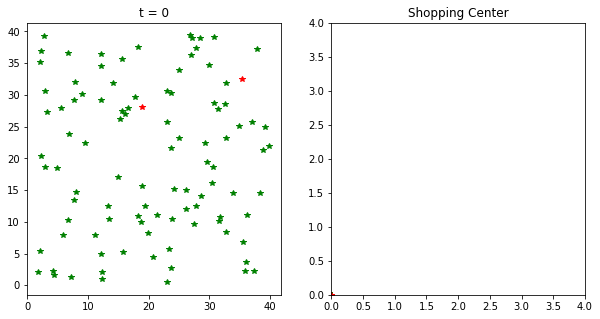

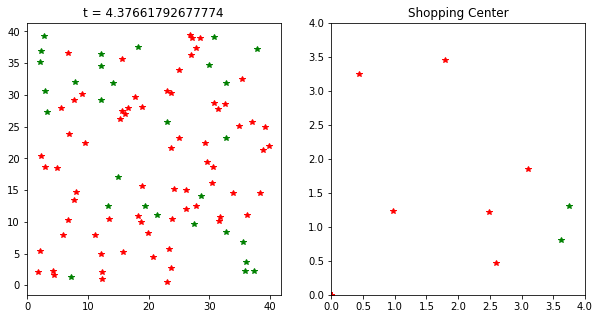

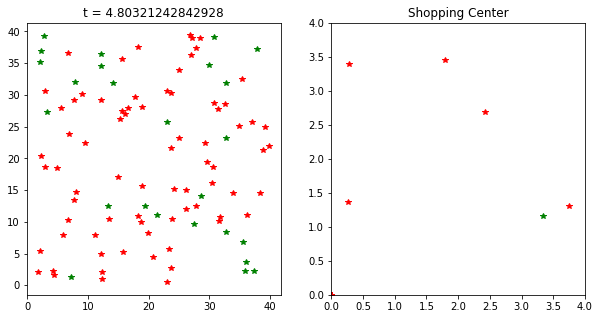

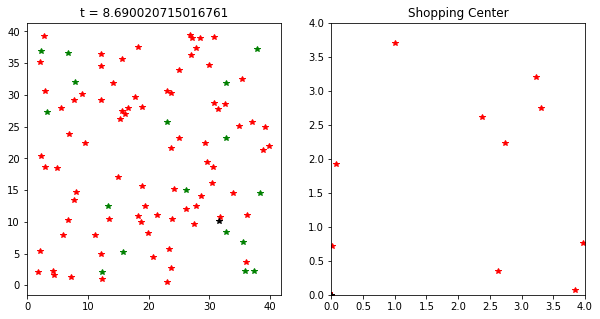

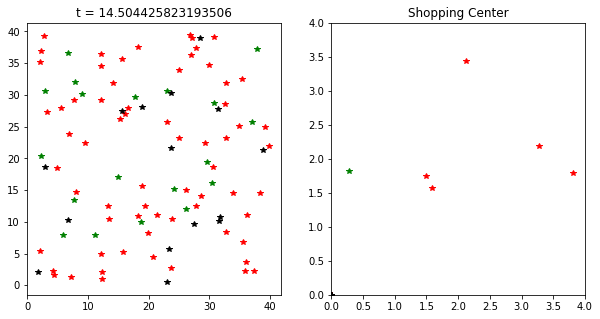

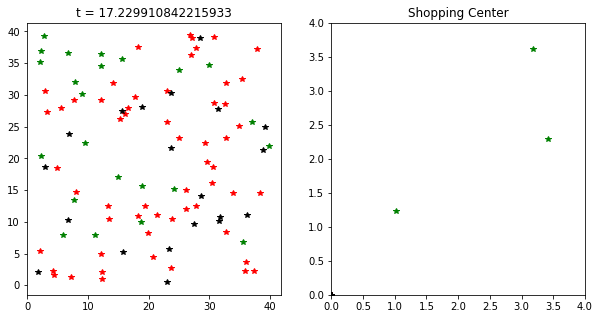

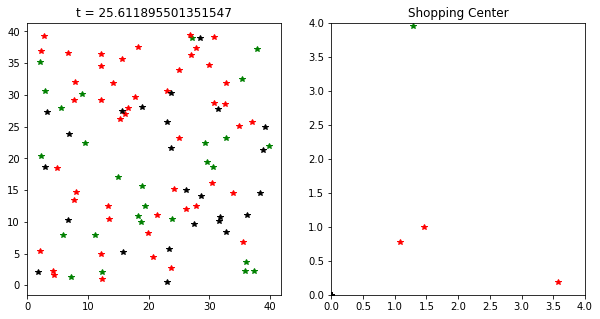

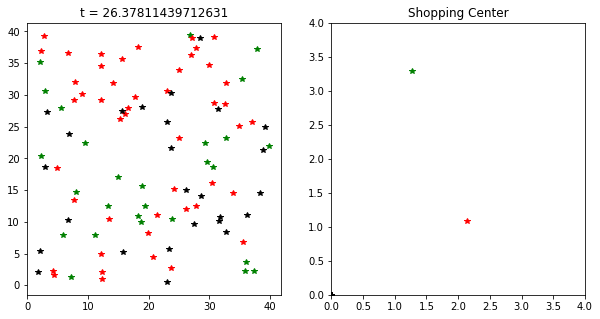

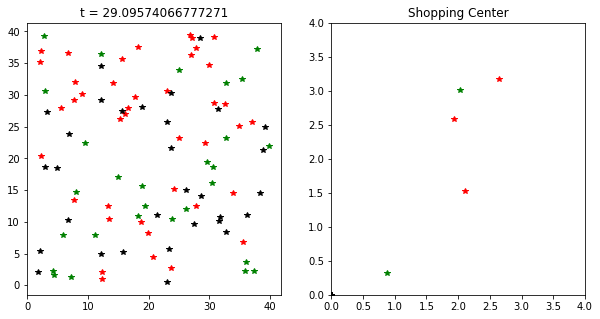

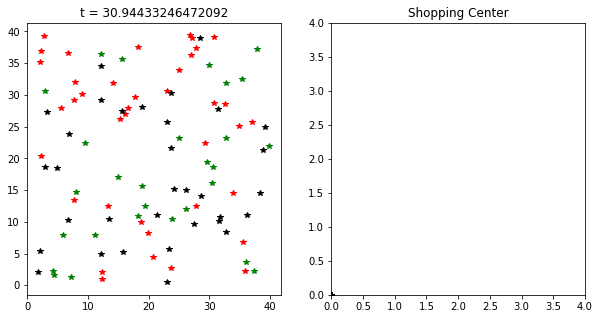

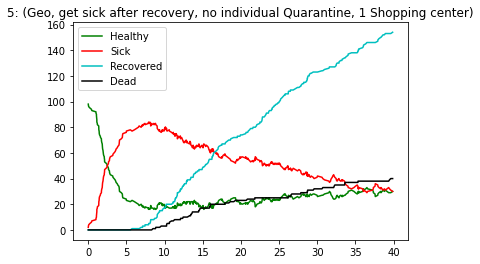

In [80]:
## 1 Shopping center
print(" ~~~~~~ 5: (Geo, get sick after recovery, no individual Quarantine, 1 Shopping center) ")

# Initialize:
# We need a table to keep the records of the state of each person, 
# because locations matter:
people = DataFrame({'x': l * random.rand(n),
                    'y': l * random.rand(n),
                    'tS': [Infinity] * n,
                    'tRorD': [Infinity] * n,
                    'state': 'h',
                    'SC': [0] * n, # 1 if person is in shopping center
                    'x_SC': zeros(n),
                    'y_SC': zeros(n),
                    't_comeback': [Infinity] * n}) # comeback time

# Assigning homes
for i in people.index :
    x = people.loc[i, 'x']
    y = people.loc[i, 'y']
    home_x = int( x // (l / n_home) )
    home_y = int( y // (l / n_home) )
    people.loc[i, 'home_id'] = str(home_x) + str(home_y)

t = 0
ns = ni # Initial sick
nh = n - ns # Initial healthy and disease potential
nr = 0
nd = 0
# All the people who are h, s, r but not dead or in the Quarantine:
n_city_alive = n + 1 # +1 is a little change to prevent from becoming 0
tSC = t + random.exponential(scale=1/( n_city_alive * mu_g)) # Event of next going to shop
# Reporting Dataframe:
timeline = DataFrame({'t': [t],
                      'Healthy': nh,
                      'Sick': ns,
                      'Recovered':nr,
                      'Dead': nd})

# Assigning the initial sicks randomly:
init_sicks = [random.randint(n) for x in range(ns)]
for sick in init_sicks :
    people.loc[sick, 'state'] = 's'
    people.loc[sick, 'tRorD'] = a + (b - a)*random.uniform()
#

# Assigning the initial tS for each person:
for i in people[people['state'] == 'h'].index :
    home_id = people.loc[i, 'home_id']
    mu_i = 0
    for j in people[(people['state'] == 's') & (people['home_id'] == home_id)].index :
        mu_i += f1(people, i, j)
    if mu_i == 0 :
        people.loc[i, 'tS'] = Infinity
    else:
        people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))
#

while t < T :
    if t * 10000 // 1 % 79 == 0 : # Showing some snapshots of the population
        plt.figure(num=112, figsize=(10, 5) )
        plt.subplot(1, 2, 1)
        plt.plot(people.loc[people['state'] == 'h', 'x'], people.loc[people['state'] == 'h', 'y'], "g*")
        plt.plot(people.loc[people['state'] == 's', 'x'], people.loc[people['state'] == 's', 'y'], "r*")
        plt.plot(people.loc[people['state'] == 'r', 'x'], people.loc[people['state'] == 'r', 'y'], "c*")
        plt.plot(people.loc[people['state'] == 'd', 'x'], people.loc[people['state'] == 'd', 'y'], "k*")
        plt.title("t = " + str(t))
        plt.subplot(1, 2, 2)
        axes = plt.gca()
        axes.set_xlim([0, l_sc])
        axes.set_ylim([0, l_sc])
        plt.plot(people.loc[people['state'] == 'h', 'x_SC'], people.loc[people['state'] == 'h', 'y_SC'], "g*")
        plt.plot(people.loc[people['state'] == 's', 'x_SC'], people.loc[people['state'] == 's', 'y_SC'], "r*")
        plt.plot(people.loc[people['state'] == 'r', 'x_SC'], people.loc[people['state'] == 'r', 'y_SC'], "c*")
        plt.plot(people.loc[people['state'] == 'd', 'x_SC'], people.loc[people['state'] == 'd', 'y_SC'], "k*")
        plt.title("Shopping Center")
        plt.show()

    if tSC == min([min(people['tS']), min(people['tRorD']), tSC, min(people['t_comeback']), T]) :
        # DONE
        t = tSC
        n_city_alive -= 1
        goer_id = people.loc[people['state'] != 'd'].sample(1).index
        people.loc[goer_id, 'SC'] = 1
        people.loc[goer_id, 'x_SC'] = l_sc * random.rand(1)
        people.loc[goer_id, 'y_SC'] = l_sc * random.rand(1)
        people.loc[goer_id, 't_comeback'] = t + a_g + (b_g - a_g)*random.uniform()
        tSC = t + random.exponential(scale=1/( n_city_alive * mu_g)) # next tSC
        # Updating the tS for all the healthy people:
        if nh > 0 :
            for i in people[people['state'] == 'h'].index :
                home_id = people.loc[i, 'home_id']
                if people.loc[i, 'SC'] == 0 :
                    mu_i = 0
                    for j in people[(people['state'] == 's') & (people['SC'] == 0) & (people['home_id'] == home_id)].index :
                        mu_i += f1(people, i, j)
                    if mu_i == 0 :
                        people.loc[i, 'tS'] = Infinity
                    else:
                        people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))
                if people.loc[i, 'SC'] == 1 :
                    mu_i = 0
                    for j in people[(people['state'] == 's') & (people['SC'] == 1)].index :
                        mu_i += f1_SC(people, i, j)
                    if mu_i == 0 :
                        people.loc[i, 'tS'] = Infinity
                    else:
                        people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))


    if min(people['t_comeback']) == min([min(people['tS']), min(people['tRorD']), tSC, min(people['t_comeback']), T]) :
        # DONE
        t = min(people['t_comeback'])
        n_city_alive += 1
        comer_id = people[ people['t_comeback'] == min(people['t_comeback'])].index
        people.loc[comer_id, 't_comeback'] = Infinity
        people.loc[comer_id, 'SC'] = 0
        people.loc[comer_id, 'x_SC'] = 0
        people.loc[comer_id, 'y_SC'] = 0
        # next tSC:
        tSC = t + random.exponential(scale=1/( n_city_alive * mu_g))
        # Updating the tS for all the healthy people:
        if nh > 0 :
            for i in people[people['state'] == 'h'].index :
                home_id = people.loc[i, 'home_id']
                if people.loc[i, 'SC'] == 0 :
                    mu_i = 0
                    for j in people[(people['state'] == 's') & (people['SC'] == 0) & (people['home_id'] == home_id)].index :
                        mu_i += f1(people, i, j)
                    if mu_i == 0 :
                        people.loc[i, 'tS'] = Infinity
                    else:
                        people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))
                if people.loc[i, 'SC'] == 1 :
                    mu_i = 0
                    for j in people[(people['state'] == 's') & (people['SC'] == 1)].index :
                        mu_i += f1_SC(people, i, j)
                    if mu_i == 0 :
                        people.loc[i, 'tS'] = Infinity
                    else:
                        people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))


    if min(people['tS']) == min([min(people['tS']), min(people['tRorD']), tSC, min(people['t_comeback']), T]) :
        # DONE
        t = min(people['tS'])
        indx = people[ people['tS'] == min(people['tS'])].index
        nh -= 1
        ns += 1
        people.loc[indx, 'tS'] = Infinity
        people.loc[indx, 'state'] = 's'
        # Recording the recovery or death of this sick:
        tRorD = a + (b - a)*random.uniform()
        people.loc[indx, 'tRorD'] = t + tRorD
        # Recording the Healthy & Sick at t:
        timeline = timeline.append({'t': t,
                                    'Healthy': nh,
                                    'Sick': ns}, ignore_index=True)
        # Updating the tS for all the healthy people:
        if nh > 0 :
            for i in people[people['state'] == 'h'].index :
                home_id = people.loc[i, 'home_id']
                if people.loc[i, 'SC'] == 0 :
                    mu_i = 0
                    for j in people[(people['state'] == 's') & (people['SC'] == 0) & (people['home_id'] == home_id)].index :
                        mu_i += f1(people, i, j)
                    if mu_i == 0 :
                        people.loc[i, 'tS'] = Infinity
                    else:
                        people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))
                if people.loc[i, 'SC'] == 1 :
                    mu_i = 0
                    for j in people[(people['state'] == 's') & (people['SC'] == 1)].index :
                        mu_i += f1_SC(people, i, j)
                    if mu_i == 0 :
                        people.loc[i, 'tS'] = Infinity
                    else:
                        people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))


    if min(people['tRorD']) == min([min(people['tS']), min(people['tRorD']), tSC, min(people['t_comeback']), T]) :
        # DONE
        t = min(people['tRorD'])
        indx = people[ people['tRorD'] == min(people['tRorD'])].index
        people.loc[indx, 'tRorD'] = Infinity
        u = random.uniform()
        if u < pr : # Someone recovers
            people.loc[indx, 'state'] = 'h'
            ns -= 1
            nr += 1
            nh += 1
            timeline = timeline.append({'t': t,
                                        'Sick': ns,
                                        'Recovered': nr,
                                        'Healthy': nh}, ignore_index=True)
        else: # Someone dies
            people.loc[indx, 'state'] = 'd'
            ns -= 1
            nd += 1
            n_city_alive -= 1
            # Removing him from shopping center:
            people.loc[indx, 'SC'] = 0
            people.loc[indx, 'x_SC'] = 0
            people.loc[indx, 'y_SC'] = 0
            people.loc[indx, 't_comeback'] = Infinity     
            #
            timeline = timeline.append({'t': t,
                                        'Sick': ns,
                                        'Dead': nd}, ignore_index=True)
        # Updating the tS for all the healthy people:
        if nh > 0 :
            for i in people[people['state'] == 'h'].index :
                home_id = people.loc[i, 'home_id']
                if people.loc[i, 'SC'] == 0 :
                    mu_i = 0
                    for j in people[(people['state'] == 's') & (people['SC'] == 0) & (people['home_id'] == home_id)].index :
                        mu_i += f1(people, i, j)
                    if mu_i == 0 :
                        people.loc[i, 'tS'] = Infinity
                    else:
                        people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))
                if people.loc[i, 'SC'] == 1 :
                    mu_i = 0
                    for j in people[(people['state'] == 's') & (people['SC'] == 1)].index :
                        mu_i += f1_SC(people, i, j)
                    if mu_i == 0 :
                        people.loc[i, 'tS'] = Infinity
                    else:
                        people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))

    
    if T == min([min(people['tS']), min(people['tRorD']), tSC, min(people['t_comeback']), T]) :
        t = T
        break

# Filling the Reporting Dataframe:
# timeline.sort_values(by='t', inplace=True)
timeline = timeline.ffill()

plt.figure(11)
plt.plot(timeline['t'], timeline['Healthy'], "g-", label="Healthy")
plt.plot(timeline['t'], timeline['Sick'], "r-", label="Sick")
plt.plot(timeline['t'], timeline['Recovered'], "c-", label="Recovered")
plt.plot(timeline['t'], timeline['Dead'], "k-", label="Dead")
plt.legend()
plt.title("5: (Geo, get sick after recovery, no individual Quarantine, 1 Shopping center)")
plt.show()


 ~~~~~~ 5: (Geo, get sick after recovery, no individual Quarantine, Multiple Shopping centers) 


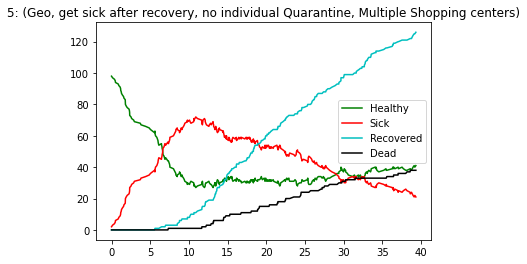

In [81]:
## Multiple Shopping centers
print(" ~~~~~~ 5: (Geo, get sick after recovery, no individual Quarantine, Multiple Shopping centers) ")

# Initialize:
# We need a table to keep the records of the state of each person, 
# because locations matter:
people = DataFrame({'x': l * random.rand(n),
                    'y': l * random.rand(n),
                    'tS': [Infinity] * n,
                    'tRorD': [Infinity] * n,
                    'state': 'h',
                    'SC': [0] * n, # 1 or more if person is in shopping center
                    'x_SC': zeros(n),
                    'y_SC': zeros(n),
                    't_comeback': [Infinity] * n}) # comeback time
# Assigning homes
for i in people.index :
    x = people.loc[i, 'x']
    y = people.loc[i, 'y']
    home_x = int( x // (l / n_home) )
    home_y = int( y // (l / n_home) )
    people.loc[i, 'home_id'] = str(home_x) + str(home_y)

t = 0
ns = ni # Initial sick number
nh = n - ns # Initial healthy and disease potential
nr = 0
nd = 0
# All the people who are h, s, r but not dead or in the Quarantine:
n_city_alive = n + 1 # +1 is a little change to prevent from becoming 0
tSC = t + random.exponential(scale=1/( n_city_alive * mu_g)) # Event of next going to shop
# Reporting Dataframe:
timeline = DataFrame({'t': [t],
                      'Healthy': nh,
                      'Sick': ns,
                      'Recovered':nr,
                      'Dead': nd})

# Assigning the initial sicks randomly:
init_sicks = [random.randint(n) for x in range(ns)]
for sick in init_sicks :
    people.loc[sick, 'state'] = 's'
    people.loc[sick, 'tRorD'] = a + (b - a)*random.uniform()
#

# Assigning the initial tS for each person:
for i in people[people['state'] == 'h'].index :
    home_id = people.loc[i, 'home_id']
    mu_i = 0
    for j in people[(people['state'] == 's') & (people['home_id'] == home_id)].index :
        mu_i += f1(people, i, j)
    if mu_i == 0 :
        people.loc[i, 'tS'] = Infinity
    else:
        people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))
#

while t < T :
    if tSC == min([min(people['tS']), min(people['tRorD']), tSC, min(people['t_comeback']), T]) :
        t = tSC
        n_city_alive -= 1
        goer_id = people.loc[people['state'] != 'd'].sample(1).index
        SC_id = 1 + random.randint(0, NSC)          ####
        people.loc[goer_id, 'SC'] = SC_id         ####
        people.loc[goer_id, 'x_SC'] = l_NSC[SC_id - 1] * random.rand(1)
        people.loc[goer_id, 'y_SC'] = l_NSC[SC_id - 1] * random.rand(1)
        people.loc[goer_id, 't_comeback'] = t + a_g + (b_g - a_g)*random.uniform()
        tSC = t + random.exponential(scale=1/( n_city_alive * mu_g)) # next tSC
        # Updating the tS for all the healthy people:
        if nh > 0 :
            for i in people[people['state'] == 'h'].index :
                home_id = people.loc[i, 'home_id']
                shop = people.loc[i, 'SC']                   ####
                if shop == 0 : # shop 0 is the main area
                    mu_i = 0
                    for j in people[(people['state'] == 's') & (people['SC'] == 0) & (people['home_id'] == home_id)].index :
                        mu_i += f1(people, i, j)
                    if mu_i == 0 :
                        people.loc[i, 'tS'] = Infinity
                    else:
                        people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))
                else :
                    mu_i = 0
                    for j in people[(people['state'] == 's') & (people['SC'] == shop)].index :
                        mu_i += f1_SC(people, i, j)
                    if mu_i == 0 :
                        people.loc[i, 'tS'] = Infinity
                    else:
                        people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))


    if min(people['t_comeback']) == min([min(people['tS']), min(people['tRorD']), tSC, min(people['t_comeback']), T]) :
        t = min(people['t_comeback'])
        n_city_alive += 1
        comer_id = people[ people['t_comeback'] == min(people['t_comeback'])].index
        people.loc[comer_id, 't_comeback'] = Infinity
        people.loc[comer_id, 'SC'] = 0
        people.loc[comer_id, 'x_SC'] = 0
        people.loc[comer_id, 'y_SC'] = 0
        tSC = t + random.exponential(scale=1/( n_city_alive * mu_g)) # next tSC
        # Updating the tS for all the healthy people:
        if nh > 0 :
            for i in people[people['state'] == 'h'].index :
                home_id = people.loc[i, 'home_id']
                shop = people.loc[i, 'SC']                   ####
                if shop == 0 : # shop 0 is the main area
                    mu_i = 0
                    for j in people[(people['state'] == 's') & (people['SC'] == 0) & (people['home_id'] == home_id)].index :
                        mu_i += f1(people, i, j)
                    if mu_i == 0 :
                        people.loc[i, 'tS'] = Infinity
                    else:
                        people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))
                else :
                    mu_i = 0
                    for j in people[(people['state'] == 's') & (people['SC'] == shop)].index :
                        mu_i += f1_SC(people, i, j)
                    if mu_i == 0 :
                        people.loc[i, 'tS'] = Infinity
                    else:
                        people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))


    if min(people['tS']) == min([min(people['tS']), min(people['tRorD']), tSC, min(people['t_comeback']), T]) :
        t = min(people['tS'])
        indx = people[ people['tS'] == min(people['tS'])].index
        nh -= 1
        ns += 1
        people.loc[indx, 'tS'] = Infinity
        people.loc[indx, 'state'] = 's'
        # Recording the recovery or death of this sick:
        tRorD = a + (b - a)*random.uniform()
        people.loc[indx, 'tRorD'] = t + tRorD
        # Recording the Healthy & Sick at t:
        timeline = timeline.append({'t': t,
                                    'Healthy': nh,
                                    'Sick': ns}, ignore_index=True)
        # Updating the tS for all the healthy people:
        if nh > 0 :
            for i in people[people['state'] == 'h'].index :
                home_id = people.loc[i, 'home_id']
                shop = people.loc[i, 'SC']                   ####
                if shop == 0 : # shop 0 is the main area
                    mu_i = 0
                    for j in people[(people['state'] == 's') & (people['SC'] == 0) & (people['home_id'] == home_id)].index :
                        mu_i += f1(people, i, j)
                    if mu_i == 0 :
                        people.loc[i, 'tS'] = Infinity
                    else:
                        people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))
                else :
                    mu_i = 0
                    for j in people[(people['state'] == 's') & (people['SC'] == shop)].index :
                        mu_i += f1_SC(people, i, j)
                    if mu_i == 0 :
                        people.loc[i, 'tS'] = Infinity
                    else:
                        people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))


    if min(people['tRorD']) == min([min(people['tS']), min(people['tRorD']), tSC, min(people['t_comeback']), T]) :
        t = min(people['tRorD'])
        indx = people[ people['tRorD'] == min(people['tRorD'])].index
        people.loc[indx, 'tRorD'] = Infinity
        u = random.uniform()
        if u < pr : # Someone recovers
            people.loc[indx, 'state'] = 'h'
            ns -= 1
            nr += 1
            nh += 1
            timeline = timeline.append({'t': t,
                                        'Sick': ns,
                                        'Recovered': nr,
                                        'Healthy': nh}, ignore_index=True)
        else: # Someone dies
            people.loc[indx, 'state'] = 'd'
            ns -= 1
            nd += 1
            n_city_alive -= 1
            # Removing him from shopping center:
            people.loc[indx, 'SC'] = 0
            people.loc[indx, 'x_SC'] = 0
            people.loc[indx, 'y_SC'] = 0
            people.loc[indx, 't_comeback'] = Infinity     
            #
            timeline = timeline.append({'t': t,
                                        'Sick': ns,
                                        'Dead': nd}, ignore_index=True)
        # Updating the tS for all the healthy people:
        if nh > 0 :
            for i in people[people['state'] == 'h'].index :
                home_id = people.loc[i, 'home_id']
                shop = people.loc[i, 'SC']                   ####
                if shop == 0 : # shop 0 is the main area
                    mu_i = 0
                    for j in people[(people['state'] == 's') & (people['SC'] == 0) & (people['home_id'] == home_id)].index :
                        mu_i += f1(people, i, j)
                    if mu_i == 0 :
                        people.loc[i, 'tS'] = Infinity
                    else:
                        people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))
                else :
                    mu_i = 0
                    for j in people[(people['state'] == 's') & (people['SC'] == shop)].index :
                        mu_i += f1_SC(people, i, j)
                    if mu_i == 0 :
                        people.loc[i, 'tS'] = Infinity
                    else:
                        people.loc[i, 'tS'] = t + random.exponential(scale=1/(nh * mu_i))

    
    if T == min([min(people['tS']), min(people['tRorD']), tSC, min(people['t_comeback']), T]) :
        t = T
        break

# Filling the Reporting Dataframe:
# timeline.sort_values(by='t', inplace=True)
timeline = timeline.ffill()

plt.figure(11)
plt.plot(timeline['t'], timeline['Healthy'], "g-", label="Healthy")
plt.plot(timeline['t'], timeline['Sick'], "r-", label="Sick")
plt.plot(timeline['t'], timeline['Recovered'], "c-", label="Recovered")
plt.plot(timeline['t'], timeline['Dead'], "k-", label="Dead")
plt.legend()
plt.title("5: (Geo, get sick after recovery, no individual Quarantine, Multiple Shopping centers)")
plt.show()
